In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import warnings
import numpy as np
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('final data.csv')
df

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00,max_consumption
0,1,3.78,2076,CL,2012-07-01,1.250,1.250,1.250,1.263,0.131,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.081,1.263
1,1,3.78,2076,GC,2012-07-01,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,1.245
2,1,3.78,2076,GG,2012-07-01,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.156
3,1,3.78,2076,CL,2012-07-02,1.250,1.250,1.125,0.000,0.925,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.069,1.250
4,1,3.78,2076,GC,2012-07-02,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,1.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268552,300,3.36,2086,GC,2013-06-29,0.171,0.832,0.440,0.745,0.149,...,0.383,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,2.403
268553,300,3.36,2086,GG,2013-06-29,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
268554,300,3.36,2086,CL,2013-06-30,2.501,2.475,2.491,2.508,2.490,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.468,2.508
268555,300,3.36,2086,GC,2013-06-30,0.150,0.158,0.157,0.137,0.163,...,0.625,0.595,0.695,0.646,0.581,0.458,0.472,0.732,0.297,2.963


In [5]:
selected_GG = pd.read_csv('selected_GG.csv')
selected_GC = pd.read_csv('selected_GC.csv')
# selected_GG

In [6]:
df_new = df[df['Consumption Category']=='GC']

In [7]:
df_new['date'] = pd.to_datetime(df_new['date'])
df_new
# df_opt = df_new

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00,max_consumption
1,1,3.78,2076,GC,2012-07-01,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,1.245
4,1,3.78,2076,GC,2012-07-02,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,1.056
7,1,3.78,2076,GC,2012-07-03,0.092,0.076,0.318,0.088,0.061,...,0.330,0.654,0.406,0.141,0.073,0.190,0.902,0.098,0.066,1.733
10,1,3.78,2076,GC,2012-07-04,0.081,0.082,0.306,0.098,0.725,...,0.403,0.204,0.286,0.203,0.521,0.259,1.306,0.259,0.260,1.948
13,1,3.78,2076,GC,2012-07-05,0.445,0.255,0.138,0.115,0.071,...,0.240,0.506,0.237,0.257,0.462,0.414,0.932,0.070,0.094,1.944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268543,300,3.36,2086,GC,2013-06-26,0.124,0.157,0.131,0.150,0.150,...,0.614,0.458,0.535,0.427,0.315,0.253,0.430,0.881,0.853,1.992
268546,300,3.36,2086,GC,2013-06-27,0.250,0.153,0.191,0.152,0.176,...,0.696,0.662,0.584,0.682,0.666,0.630,0.417,0.295,0.607,1.223
268549,300,3.36,2086,GC,2013-06-28,0.548,0.817,0.155,0.187,0.171,...,1.319,1.259,0.921,0.667,0.495,0.486,0.389,0.448,0.269,2.283
268552,300,3.36,2086,GC,2013-06-29,0.171,0.832,0.440,0.745,0.149,...,0.383,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,2.403


In [8]:
# coverting half hourly energy into load 60/30 == *2
columns_to_multiply = df_new.columns[5:53]
df_new[columns_to_multiply] = df_new[columns_to_multiply] * 2
column_to_drop = 'max_consumption'
df_new = df_new.drop(column_to_drop, axis=1)
df_opt = df_new
df_temp = df_new
df_new 

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
1,1,3.78,2076,GC,2012-07-01,1.710,1.572,1.208,1.088,1.194,...,0.658,0.748,0.894,1.098,0.272,0.576,0.362,1.302,0.180,0.136
4,1,3.78,2076,GC,2012-07-02,0.618,0.164,0.118,0.194,0.580,...,1.392,0.706,0.928,0.458,1.622,0.444,0.612,2.068,0.272,0.134
7,1,3.78,2076,GC,2012-07-03,0.184,0.152,0.636,0.176,0.122,...,0.536,0.660,1.308,0.812,0.282,0.146,0.380,1.804,0.196,0.132
10,1,3.78,2076,GC,2012-07-04,0.162,0.164,0.612,0.196,1.450,...,1.270,0.806,0.408,0.572,0.406,1.042,0.518,2.612,0.518,0.520
13,1,3.78,2076,GC,2012-07-05,0.890,0.510,0.276,0.230,0.142,...,0.416,0.480,1.012,0.474,0.514,0.924,0.828,1.864,0.140,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268543,300,3.36,2086,GC,2013-06-26,0.248,0.314,0.262,0.300,0.300,...,1.020,1.228,0.916,1.070,0.854,0.630,0.506,0.860,1.762,1.706
268546,300,3.36,2086,GC,2013-06-27,0.500,0.306,0.382,0.304,0.352,...,1.308,1.392,1.324,1.168,1.364,1.332,1.260,0.834,0.590,1.214
268549,300,3.36,2086,GC,2013-06-28,1.096,1.634,0.310,0.374,0.342,...,3.128,2.638,2.518,1.842,1.334,0.990,0.972,0.778,0.896,0.538
268552,300,3.36,2086,GC,2013-06-29,0.342,1.664,0.880,1.490,0.298,...,0.872,0.766,0.808,0.734,0.796,0.700,0.456,0.340,0.278,0.342


In [9]:
test_df = df_new[df_new['Customer']==1]

In [10]:
# test_df['date'] = pd.to_datetime(test_df['date'])

In [11]:
test_df

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
1,1,3.78,2076,GC,2012-07-01,1.710,1.572,1.208,1.088,1.194,...,0.658,0.748,0.894,1.098,0.272,0.576,0.362,1.302,0.180,0.136
4,1,3.78,2076,GC,2012-07-02,0.618,0.164,0.118,0.194,0.580,...,1.392,0.706,0.928,0.458,1.622,0.444,0.612,2.068,0.272,0.134
7,1,3.78,2076,GC,2012-07-03,0.184,0.152,0.636,0.176,0.122,...,0.536,0.660,1.308,0.812,0.282,0.146,0.380,1.804,0.196,0.132
10,1,3.78,2076,GC,2012-07-04,0.162,0.164,0.612,0.196,1.450,...,1.270,0.806,0.408,0.572,0.406,1.042,0.518,2.612,0.518,0.520
13,1,3.78,2076,GC,2012-07-05,0.890,0.510,0.276,0.230,0.142,...,0.416,0.480,1.012,0.474,0.514,0.924,0.828,1.864,0.140,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1,3.78,2076,GC,2013-06-26,1.630,1.730,1.860,1.714,0.898,...,0.392,0.480,0.422,0.448,0.504,1.276,0.464,0.628,1.388,0.058
1084,1,3.78,2076,GC,2013-06-27,0.214,0.056,0.322,0.264,0.234,...,0.510,0.420,0.482,0.416,1.168,0.242,0.228,0.378,1.492,0.158
1087,1,3.78,2076,GC,2013-06-28,0.144,0.154,0.152,0.140,0.162,...,0.512,0.368,0.650,0.526,0.978,0.530,0.204,0.896,2.384,1.056
1090,1,3.78,2076,GC,2013-06-29,1.194,1.052,1.188,0.248,0.352,...,0.470,0.364,0.558,0.382,0.872,0.890,0.172,0.290,1.268,0.200


In [12]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Autumn'
    elif 6 <= month <= 8:
        return 'Winter'
    elif 9 <= month <= 11:
        return 'Spring'
    else:
        return 'Summer'

# Extract the month from the 'Date' column and apply the get_season function
test_df['Month'] = test_df['date'].dt.month
test_df['Season'] = test_df['Month'].apply(get_season)

In [13]:
test_df

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month,Season
1,1,3.78,2076,GC,2012-07-01,1.710,1.572,1.208,1.088,1.194,...,0.894,1.098,0.272,0.576,0.362,1.302,0.180,0.136,7,Winter
4,1,3.78,2076,GC,2012-07-02,0.618,0.164,0.118,0.194,0.580,...,0.928,0.458,1.622,0.444,0.612,2.068,0.272,0.134,7,Winter
7,1,3.78,2076,GC,2012-07-03,0.184,0.152,0.636,0.176,0.122,...,1.308,0.812,0.282,0.146,0.380,1.804,0.196,0.132,7,Winter
10,1,3.78,2076,GC,2012-07-04,0.162,0.164,0.612,0.196,1.450,...,0.408,0.572,0.406,1.042,0.518,2.612,0.518,0.520,7,Winter
13,1,3.78,2076,GC,2012-07-05,0.890,0.510,0.276,0.230,0.142,...,1.012,0.474,0.514,0.924,0.828,1.864,0.140,0.188,7,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1,3.78,2076,GC,2013-06-26,1.630,1.730,1.860,1.714,0.898,...,0.422,0.448,0.504,1.276,0.464,0.628,1.388,0.058,6,Winter
1084,1,3.78,2076,GC,2013-06-27,0.214,0.056,0.322,0.264,0.234,...,0.482,0.416,1.168,0.242,0.228,0.378,1.492,0.158,6,Winter
1087,1,3.78,2076,GC,2013-06-28,0.144,0.154,0.152,0.140,0.162,...,0.650,0.526,0.978,0.530,0.204,0.896,2.384,1.056,6,Winter
1090,1,3.78,2076,GC,2013-06-29,1.194,1.052,1.188,0.248,0.352,...,0.558,0.382,0.872,0.890,0.172,0.290,1.268,0.200,6,Winter


In [14]:
test_df = test_df.groupby('Season').mean()

In [15]:
test_df

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month
Season,,,,,,,,,,,,,,,,,,,,,
Autumn,1.0,3.78,2076.0,0.437565,0.429283,0.425630,0.442000,0.495261,0.551957,1.506717,...,0.463783,0.465826,0.455022,0.450326,0.417283,0.422478,0.958152,1.593174,0.463348,4.00000
Spring,1.0,3.78,2076.0,0.459407,0.469582,0.439538,0.411582,0.334945,0.393956,1.502440,...,0.542659,0.517341,0.516879,0.474440,0.402374,0.427846,1.591824,1.147253,0.606286,10.00000
Summer,1.0,3.78,2076.0,0.302978,0.258978,0.293000,0.271689,0.238067,0.358556,1.588933,...,0.468333,0.455022,0.454578,0.435156,0.370933,0.410978,1.645044,1.515733,0.303133,5.10000
Winter,1.0,3.78,2076.0,0.693804,0.668565,0.604130,0.597261,0.556348,0.676000,1.723891,...,0.601543,0.602022,0.583435,0.673587,0.567717,0.598196,1.314957,1.008000,0.630326,7.01087


In [16]:
customers = df_new['Customer'].unique()

In [17]:
customers.sort()

In [18]:
season_df_list = []

In [19]:
for c in customers:
    test_df = df_new[df_new['Customer']==c]
    test_df['Month'] = test_df['date'].dt.month
    test_df['Season'] = test_df['Month'].apply(get_season)
    test_df = test_df.groupby('Season').mean()
    season_df_list.append(test_df)


In [20]:
final_season_df = pd.concat(season_df_list, ignore_index=True)

In [21]:
final_season_df

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month
0,1.0,3.78,2076.0,0.437565,0.429283,0.425630,0.442000,0.495261,0.551957,1.506717,...,0.463783,0.465826,0.455022,0.450326,0.417283,0.422478,0.958152,1.593174,0.463348,4.00000
1,1.0,3.78,2076.0,0.459407,0.469582,0.439538,0.411582,0.334945,0.393956,1.502440,...,0.542659,0.517341,0.516879,0.474440,0.402374,0.427846,1.591824,1.147253,0.606286,10.00000
2,1.0,3.78,2076.0,0.302978,0.258978,0.293000,0.271689,0.238067,0.358556,1.588933,...,0.468333,0.455022,0.454578,0.435156,0.370933,0.410978,1.645044,1.515733,0.303133,5.10000
3,1.0,3.78,2076.0,0.693804,0.668565,0.604130,0.597261,0.556348,0.676000,1.723891,...,0.601543,0.602022,0.583435,0.673587,0.567717,0.598196,1.314957,1.008000,0.630326,7.01087
4,2.0,1.62,2259.0,0.391065,0.347000,0.334913,0.341565,0.364022,0.311478,0.312652,...,1.140370,1.112543,1.023326,0.958130,0.857978,0.665500,0.593457,0.536326,0.454174,4.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,299.0,1.00,2076.0,0.710652,0.597804,0.573326,0.580761,0.573217,0.574261,0.583391,...,2.839674,2.744500,2.669761,2.487435,2.097043,1.807913,1.371457,1.045522,0.865457,7.01087
1196,300.0,3.36,2086.0,1.251326,0.786370,0.577217,0.514848,0.460000,0.830304,0.869826,...,1.295130,1.272239,1.162717,1.130630,1.053957,1.055848,1.114500,1.041457,1.379804,4.00000
1197,300.0,3.36,2086.0,1.593934,1.011648,0.513758,0.426923,0.392945,0.375890,0.371187,...,1.526440,1.422308,1.368330,1.359495,1.316374,1.173912,1.350703,1.455560,1.854220,10.00000
1198,300.0,3.36,2086.0,2.076822,1.008756,0.627267,0.524333,0.500844,0.486800,0.481267,...,1.720956,1.583244,1.545111,1.469356,1.328911,1.238400,1.169511,1.081467,2.128200,5.10000


In [22]:
temp_lst = []
for c in customers :
    temp_lst.append('Autumn')
    temp_lst.append('Spring')
    temp_lst.append('Summer')
    temp_lst.append('Winter')

In [23]:
# len(temp_lst)
# temp_lst


In [24]:
final_season_df['seasons'] = temp_lst

In [25]:
final_season_df

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month,seasons
0,1.0,3.78,2076.0,0.437565,0.429283,0.425630,0.442000,0.495261,0.551957,1.506717,...,0.465826,0.455022,0.450326,0.417283,0.422478,0.958152,1.593174,0.463348,4.00000,Autumn
1,1.0,3.78,2076.0,0.459407,0.469582,0.439538,0.411582,0.334945,0.393956,1.502440,...,0.517341,0.516879,0.474440,0.402374,0.427846,1.591824,1.147253,0.606286,10.00000,Spring
2,1.0,3.78,2076.0,0.302978,0.258978,0.293000,0.271689,0.238067,0.358556,1.588933,...,0.455022,0.454578,0.435156,0.370933,0.410978,1.645044,1.515733,0.303133,5.10000,Summer
3,1.0,3.78,2076.0,0.693804,0.668565,0.604130,0.597261,0.556348,0.676000,1.723891,...,0.602022,0.583435,0.673587,0.567717,0.598196,1.314957,1.008000,0.630326,7.01087,Winter
4,2.0,1.62,2259.0,0.391065,0.347000,0.334913,0.341565,0.364022,0.311478,0.312652,...,1.112543,1.023326,0.958130,0.857978,0.665500,0.593457,0.536326,0.454174,4.00000,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,299.0,1.00,2076.0,0.710652,0.597804,0.573326,0.580761,0.573217,0.574261,0.583391,...,2.744500,2.669761,2.487435,2.097043,1.807913,1.371457,1.045522,0.865457,7.01087,Winter
1196,300.0,3.36,2086.0,1.251326,0.786370,0.577217,0.514848,0.460000,0.830304,0.869826,...,1.272239,1.162717,1.130630,1.053957,1.055848,1.114500,1.041457,1.379804,4.00000,Autumn
1197,300.0,3.36,2086.0,1.593934,1.011648,0.513758,0.426923,0.392945,0.375890,0.371187,...,1.422308,1.368330,1.359495,1.316374,1.173912,1.350703,1.455560,1.854220,10.00000,Spring
1198,300.0,3.36,2086.0,2.076822,1.008756,0.627267,0.524333,0.500844,0.486800,0.481267,...,1.583244,1.545111,1.469356,1.328911,1.238400,1.169511,1.081467,2.128200,5.10000,Summer


In [26]:
# final_season_df['seasonal_sum'] = final_season_df.iloc[:, 3:50].sum(axis=1)
    

In [27]:
column_index = final_season_df.columns.get_loc('00:00')
column_index

50

In [28]:
final_season_df['seasonal_sum'] = final_season_df.iloc[:, 3:51].sum(axis=1)

In [29]:
final_season_df

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month,seasons,seasonal_sum
0,1.0,3.78,2076.0,0.437565,0.429283,0.425630,0.442000,0.495261,0.551957,1.506717,...,0.455022,0.450326,0.417283,0.422478,0.958152,1.593174,0.463348,4.00000,Autumn,26.527652
1,1.0,3.78,2076.0,0.459407,0.469582,0.439538,0.411582,0.334945,0.393956,1.502440,...,0.516879,0.474440,0.402374,0.427846,1.591824,1.147253,0.606286,10.00000,Spring,27.150945
2,1.0,3.78,2076.0,0.302978,0.258978,0.293000,0.271689,0.238067,0.358556,1.588933,...,0.454578,0.435156,0.370933,0.410978,1.645044,1.515733,0.303133,5.10000,Summer,25.788489
3,1.0,3.78,2076.0,0.693804,0.668565,0.604130,0.597261,0.556348,0.676000,1.723891,...,0.583435,0.673587,0.567717,0.598196,1.314957,1.008000,0.630326,7.01087,Winter,36.168739
4,2.0,1.62,2259.0,0.391065,0.347000,0.334913,0.341565,0.364022,0.311478,0.312652,...,1.023326,0.958130,0.857978,0.665500,0.593457,0.536326,0.454174,4.00000,Autumn,28.716391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,299.0,1.00,2076.0,0.710652,0.597804,0.573326,0.580761,0.573217,0.574261,0.583391,...,2.669761,2.487435,2.097043,1.807913,1.371457,1.045522,0.865457,7.01087,Winter,72.332652
1196,300.0,3.36,2086.0,1.251326,0.786370,0.577217,0.514848,0.460000,0.830304,0.869826,...,1.162717,1.130630,1.053957,1.055848,1.114500,1.041457,1.379804,4.00000,Autumn,49.983696
1197,300.0,3.36,2086.0,1.593934,1.011648,0.513758,0.426923,0.392945,0.375890,0.371187,...,1.368330,1.359495,1.316374,1.173912,1.350703,1.455560,1.854220,10.00000,Spring,52.791626
1198,300.0,3.36,2086.0,2.076822,1.008756,0.627267,0.524333,0.500844,0.486800,0.481267,...,1.545111,1.469356,1.328911,1.238400,1.169511,1.081467,2.128200,5.10000,Summer,53.392378


In [30]:
columns_to_copy = ['Customer', 'seasonal_sum','seasons']
temp_data = pd.DataFrame()
# Store the selected columns from df1 into df2
temp_data[columns_to_copy] = final_season_df[columns_to_copy]

In [31]:
temp_data

,Customer,seasonal_sum,seasons
0,1.0,26.527652,Autumn
1,1.0,27.150945,Spring
2,1.0,25.788489,Summer
3,1.0,36.168739,Winter
4,2.0,28.716391,Autumn
...,...,...,...
1195,299.0,72.332652,Winter
1196,300.0,49.983696,Autumn
1197,300.0,52.791626,Spring
1198,300.0,53.392378,Summer


In [32]:
test_data = temp_data[temp_data['Customer']==1]
test_data

,Customer,seasonal_sum,seasons
0,1.0,26.527652,Autumn
1,1.0,27.150945,Spring
2,1.0,25.788489,Summer
3,1.0,36.168739,Winter


In [33]:
sum_of_seasonal_mean = test_data['seasonal_sum'].sum()/4
sum_of_seasonal_mean

28.908956312045444

In [34]:
seasonal_sum_list_1 = test_data['seasonal_sum'].tolist()
seasonal_sum_list_1

[26.52765217391304, 27.150945054945055, 25.788488888888892, 36.16873913043479]

In [35]:
var =  np.var(seasonal_sum_list_1, ddof=1)
var

23.73432549584687

In [36]:
# population_variance = np.var(seasonal_sum_list_1)
# population_variance


In [37]:
temp_ls = []
for c in customers:
    test_data = temp_data[temp_data['Customer']==c]
    sum_of_seasonal_mean = test_data['seasonal_sum'].sum()/4
    seasonal_sum_list_1 = test_data['seasonal_sum'].tolist()
    var =  np.var(seasonal_sum_list_1, ddof=1)
    temp_ls.append(var)
    

In [38]:
len(temp_ls)


300

In [39]:
temp_ls

[23.73432549584687,
 3.699624608749632,
 22.019018054998128,
 3.610919524277236,
 96.54789250348655,
 124.3653824861088,
 16.45172791753276,
 84.8228264675404,
 65.13487152459452,
 20.958164185358328,
 17.670416932779307,
 4.60723012149447,
 212.83332401203975,
 8.489080800818272,
 4.161860721917031,
 237.6935768966555,
 70.15509032752168,
 23.379085836039938,
 3.1997641520653684,
 232.1806417464492,
 9.959088292164404,
 102.64313573492522,
 6.9338557245444425,
 15.916599323192154,
 174.96453571051475,
 658.7963267758613,
 55.32543984522104,
 4.958259396465459,
 78.81953314560663,
 27.468912880974823,
 212.09156525676954,
 15.6352241335563,
 106.9986749376172,
 130.85005187765992,
 40.49153535346935,
 45.43462465660554,
 1.0241514737596764,
 39.72186882816392,
 32.59323011941864,
 15.51931632623212,
 4.794144177226831,
 13.763560183590855,
 8.9408000931866,
 59.540146537305894,
 1.5679462672191236,
 1.4468679271666043,
 12.464960334580226,
 22.547106509122433,
 42.8816453716538,
 3.721

In [40]:
var_df = pd.DataFrame()

In [41]:
var_df['Customers']= customers
var_df['variance']= temp_ls
var_df

,Customers,variance
0,1,23.734325
1,2,3.699625
2,3,22.019018
3,4,3.610920
4,5,96.547893
...,...,...
295,296,7.059181
296,297,5.077020
297,298,3.522968
298,299,158.455843


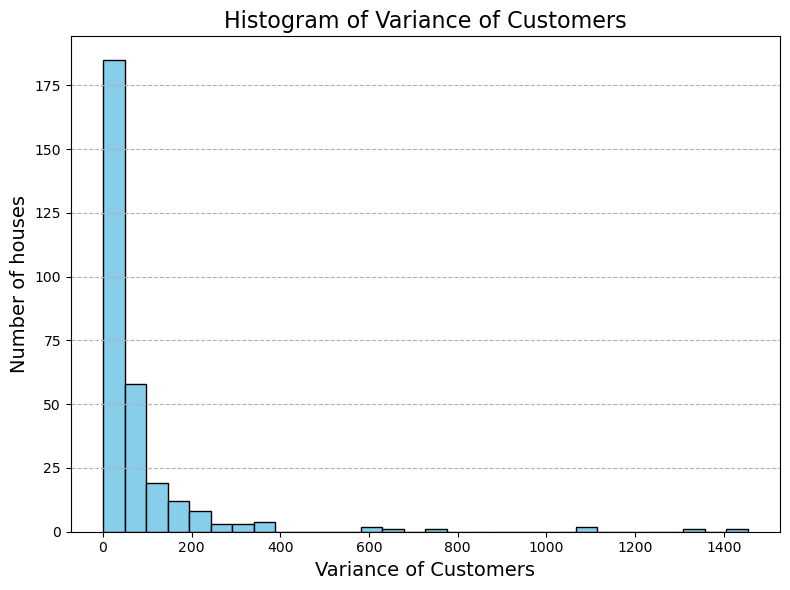

In [42]:
# plt.bar(temp_ls, customers, width=25,color = 'darkblue',edgecolor='black')  # Adjust the width as needed

# # Set labels and title
# plt.xlabel('Variance of Customers',fontsize=14)
# plt.ylabel('Number of Customers',fontsize=14)
# plt.title('Histogram of Variance of Customers',fontsize=14)
# # # plt.grid(True, linestyle='--', alpha=0.5)
# # plt.xticks(fontsize=12)  # Set xticks fontsize
# # plt.yticks(fontsize=12)  # Set yticks fontsize
# # plt.tight_layout()  # Adjust layout to prevent clipping of labels
# # Show the plot
# plt.show()

# Create a histogram from the list
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.hist(temp_ls, bins=30, color='skyblue', edgecolor='black')  # Adjust colors and bins
plt.xlabel('Variance of Customers', fontsize=14)  # Set xlabel and fontsize
plt.ylabel('Number of houses', fontsize=14)  # Set ylabel and fontsize
plt.title('Histogram of Variance of Customers', fontsize=16)  # Set title and fontsize
plt.grid(axis='y', linestyle='--')  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('histogram_of_Variance_of_Customers.png')  # Save the plot as an image
plt.show()  # Show the plot

In [43]:
selected_houses= var_df[var_df['variance'] > 150]

In [44]:
selected_houses.reset_index()

,index,Customers,variance
0,12,13,212.833324
1,15,16,237.693577
2,19,20,232.180642
3,24,25,174.964536
4,25,26,658.796327
5,30,31,212.091565
6,71,72,239.637773
7,78,79,182.037167
8,91,92,268.954446
9,93,94,306.145715


In [45]:
selected_houses.count()

Customers    37
variance     37
dtype: int64

In [46]:
selected_houses = selected_houses.drop('variance', axis=1)

In [47]:
# 94 96 194 221 232 279 293 
selected_houses.reset_index()

,index,Customers
0,12,13
1,15,16
2,19,20
3,24,25
4,25,26
5,30,31
6,71,72
7,78,79
8,91,92
9,93,94


In [48]:
# selected_houses.to_csv('selected_houses.csv', index=False)

In [49]:
df_new = df_new.groupby('Customer').mean()

In [50]:
# df_new.reset_index()
# print("Column Names:", df_new.columns.tolist())
reset_df = df_new.reset_index()
reset_df

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
0,1,3.78,2076.0,0.474411,0.457649,0.441386,0.431556,0.407271,0.496142,1.580663,...,0.549277,0.519293,0.510334,0.502701,0.508871,0.440055,0.465271,1.375441,1.315408,0.501567
1,2,1.62,2259.0,0.420366,0.370655,0.357408,0.332352,0.333662,0.308732,0.307859,...,1.164789,1.196183,1.165324,1.104479,0.995303,0.926134,0.781993,0.663746,0.571859,0.494042
2,3,1.00,2263.0,0.292986,0.232860,0.194932,0.161052,0.135978,0.132088,0.125529,...,0.304225,0.350071,0.335721,0.341699,0.349112,0.340203,0.365189,0.338690,0.284104,0.280049
3,4,1.00,2220.0,0.245079,0.229255,0.219047,0.219452,0.213074,0.214893,0.218882,...,0.788800,0.726548,0.689545,0.617458,0.577107,0.505496,0.431600,0.395748,0.334405,0.283063
4,5,1.00,2261.0,0.262488,0.245890,0.238652,0.231123,0.230000,0.226658,0.204559,...,0.887211,0.842997,0.831321,0.781633,0.704411,0.613605,0.491523,0.440175,0.365699,0.304318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1.08,2087.0,0.124170,0.115205,0.112274,0.107901,0.105951,0.103425,0.102937,...,0.429518,0.367304,0.343507,0.334800,0.315836,0.283814,0.231145,0.195803,0.162416,0.137858
296,297,1.50,2261.0,0.434751,0.421348,0.414192,0.398953,0.391605,0.367403,0.359704,...,1.052290,0.920203,0.752241,0.614526,0.538685,0.486247,0.454455,0.444564,0.440800,0.433173
297,298,1.02,2216.0,0.251578,0.216910,0.189605,0.177216,0.164345,0.162811,0.160712,...,0.710449,0.708789,0.670581,0.629282,0.563573,0.506422,0.451622,0.390395,0.332170,0.292564
298,299,1.00,2076.0,0.518236,0.440630,0.412312,0.391742,0.394416,0.391200,0.398099,...,1.952225,1.868581,1.867047,1.870526,1.763074,1.544329,1.345030,1.035008,0.789030,0.644033


In [51]:
selected_rows = reset_df[reset_df['Customer'].isin(selected_houses['Customers'])]

In [52]:
selected_rows

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
12,13,2.22,2261.0,0.245874,0.204899,0.174712,0.174773,0.162784,0.159167,0.172153,...,1.054400,1.011041,0.861216,0.769644,0.614504,0.478504,0.410636,0.380537,0.329014,0.308170
15,16,3.33,2208.0,0.506734,0.495978,0.480647,0.464115,0.448729,0.454389,0.445951,...,1.440077,1.359167,1.278471,1.123211,0.981682,0.882822,0.801375,0.677633,0.591732,0.533836
19,20,1.57,2259.0,0.756274,0.735162,0.719315,0.703321,0.654060,0.637425,0.612542,...,1.360449,1.311386,1.432986,1.487644,1.432247,1.250044,1.025277,0.910855,0.814586,0.797222
24,25,1.02,2285.0,0.218279,0.173989,0.159293,0.153529,0.155249,0.161644,0.162844,...,1.412893,1.357375,1.263375,1.108219,0.885134,0.728405,0.623715,0.544679,0.427041,0.338625
25,26,1.02,2300.0,1.035901,1.011156,1.057836,1.086690,1.179074,1.350877,1.515627,...,0.907616,0.966378,0.929447,0.926493,0.926740,0.958214,1.035764,1.136121,1.136718,1.105370
30,31,1.53,2025.0,0.371770,0.355781,0.342647,0.329332,0.313907,0.305814,0.297841,...,0.879419,0.811403,0.747452,0.763732,0.780071,0.752088,0.706734,0.612504,0.471841,0.410225
71,72,1.02,2261.0,0.406932,0.416301,0.412164,0.453611,0.479989,0.474422,0.475748,...,0.714230,0.746164,0.746636,0.751984,0.766307,0.667233,0.525058,0.423600,0.406153,0.395310
78,79,1.44,2039.0,0.523299,0.565764,0.623995,0.655803,0.684773,0.712740,0.630416,...,0.880899,0.810367,1.193764,1.167819,1.059419,0.921978,0.672942,0.468416,0.384197,0.419764
91,92,1.10,2190.0,0.282027,0.276093,0.275386,0.286329,0.272515,0.273715,0.277951,...,0.989490,0.960778,0.890082,0.838619,0.678247,0.435079,0.332301,0.303255,0.289803,0.273282
93,94,1.02,2119.0,0.893342,0.781041,0.689660,0.608449,0.531710,0.439951,0.375096,...,1.380027,1.366696,1.356795,1.395649,1.363951,1.371737,1.382192,1.339479,1.237671,1.051359


In [53]:
# selected_rows.to_csv('selected_houses.csv', index=False)

In [54]:
# print seasona data a customer
final_season_df

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month,seasons,seasonal_sum
0,1.0,3.78,2076.0,0.437565,0.429283,0.425630,0.442000,0.495261,0.551957,1.506717,...,0.455022,0.450326,0.417283,0.422478,0.958152,1.593174,0.463348,4.00000,Autumn,26.527652
1,1.0,3.78,2076.0,0.459407,0.469582,0.439538,0.411582,0.334945,0.393956,1.502440,...,0.516879,0.474440,0.402374,0.427846,1.591824,1.147253,0.606286,10.00000,Spring,27.150945
2,1.0,3.78,2076.0,0.302978,0.258978,0.293000,0.271689,0.238067,0.358556,1.588933,...,0.454578,0.435156,0.370933,0.410978,1.645044,1.515733,0.303133,5.10000,Summer,25.788489
3,1.0,3.78,2076.0,0.693804,0.668565,0.604130,0.597261,0.556348,0.676000,1.723891,...,0.583435,0.673587,0.567717,0.598196,1.314957,1.008000,0.630326,7.01087,Winter,36.168739
4,2.0,1.62,2259.0,0.391065,0.347000,0.334913,0.341565,0.364022,0.311478,0.312652,...,1.023326,0.958130,0.857978,0.665500,0.593457,0.536326,0.454174,4.00000,Autumn,28.716391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,299.0,1.00,2076.0,0.710652,0.597804,0.573326,0.580761,0.573217,0.574261,0.583391,...,2.669761,2.487435,2.097043,1.807913,1.371457,1.045522,0.865457,7.01087,Winter,72.332652
1196,300.0,3.36,2086.0,1.251326,0.786370,0.577217,0.514848,0.460000,0.830304,0.869826,...,1.162717,1.130630,1.053957,1.055848,1.114500,1.041457,1.379804,4.00000,Autumn,49.983696
1197,300.0,3.36,2086.0,1.593934,1.011648,0.513758,0.426923,0.392945,0.375890,0.371187,...,1.368330,1.359495,1.316374,1.173912,1.350703,1.455560,1.854220,10.00000,Spring,52.791626
1198,300.0,3.36,2086.0,2.076822,1.008756,0.627267,0.524333,0.500844,0.486800,0.481267,...,1.545111,1.469356,1.328911,1.238400,1.169511,1.081467,2.128200,5.10000,Summer,53.392378


In [55]:
# final_season_df.to_csv('final_season_df.csv', index=False)

In [56]:
def multiline_hourly_plot(dataset, avg = None, ycol = 'GC', ymin = None, ymax = None, opacity = None, title = None):
    fig, ax = plt.subplots()
    
    if ymin is not None:
        ax.set_ylim(bottom = ymin)
    
    if ymax is not None:
        ax.set_ylim(top = 3)
        
    if opacity is None:
        opacity = 0.01
        
    colors = ['red', 'green', 'blue','black']
    i = 0
    for key, group in dataset:
#         print(key[1])
        ax = group.groupby('hour').mean().plot(ax = ax, y = ycol,label = key[1] ,color = colors[i], alpha = 1)
        i=i+1
    
    if avg is not None:
        ax = avg.groupby('hour').mean().plot(ax = ax, y = ycol, color = '#FF0000', alpha = 1, linewidth = 2)
        
    if title is not None:
        ax.set_title(title)

    ax.legend()
    plt.savefig('seasonal_variance.png')
    plt.show()

In [57]:
def seasonal_visualisation(kmeans_df, id_vars, value_vars):
    melt_df = pd.melt(kmeans_df, id_vars = id_vars, value_vars = value_vars, var_name = 'hour', value_name = 'norm_energy')
#     clusters = kmeans_df['cluster'].unique()
#     clusters.sort()
    customer = kmeans_df['Customer'].unique()
    for c in customer:
        avg = melt_df[melt_df.Customer == c]
        avg['hour'] = pd.to_datetime(avg['hour']).dt.time
        # Sort the DataFrame based on the 'hour' column
        avg = avg.sort_values(by='hour')
        data = avg.groupby(id_vars)
        multiline_hourly_plot(data, ymin = 0, ycol = 'norm_energy',ymax = 1.2, opacity = 0.1, title = 'seasonal_plot ' + str(c))

In [58]:
x_temp = final_season_df[final_season_df['Customer'] == 12]
x_temp

,Customer,Generator Capacity,Postcode,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,21:00,21:30,22:00,22:30,23:00,23:30,00:00,Month,seasons,seasonal_sum
44,12.0,1.04,2218.0,0.425174,0.408543,0.387435,0.392870,0.383283,0.384609,0.367587,...,0.914957,0.864283,0.819674,0.743130,0.608717,0.519761,0.467957,4.00000,Autumn,32.243543
45,12.0,1.04,2218.0,0.403824,0.383209,0.377582,0.369582,0.342835,0.317077,0.330462,...,0.914615,0.909495,0.832791,0.718264,0.584440,0.484901,0.430681,10.00000,Spring,30.308527
46,12.0,1.04,2218.0,0.479667,0.454956,0.429067,0.415578,0.406156,0.401844,0.410822,...,0.976178,0.952733,0.895489,0.813267,0.664111,0.587844,0.534844,5.10000,Summer,34.947800
47,12.0,1.04,2218.0,0.431609,0.397261,0.358674,0.341913,0.316957,0.309130,0.309348,...,1.118022,1.043826,0.942217,0.784783,0.645043,0.582652,0.487630,7.01087,Winter,34.487130


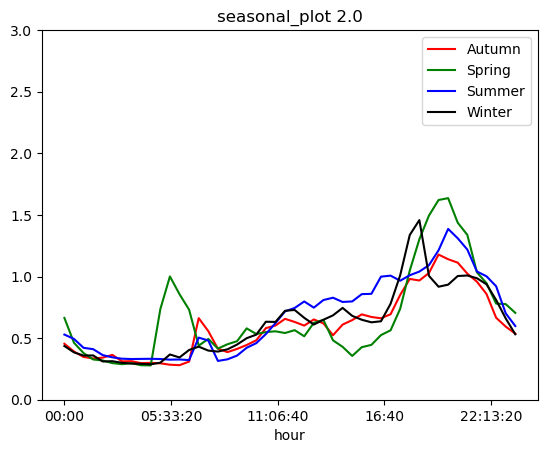

In [59]:
seasonal_visualisation(final_season_df[final_season_df['Customer'] == 2], id_vars = ['Customer', 'seasons'], value_vars = list(final_season_df.columns[3:51]))

In [60]:
df_opt

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
1,1,3.78,2076,GC,2012-07-01,1.710,1.572,1.208,1.088,1.194,...,0.658,0.748,0.894,1.098,0.272,0.576,0.362,1.302,0.180,0.136
4,1,3.78,2076,GC,2012-07-02,0.618,0.164,0.118,0.194,0.580,...,1.392,0.706,0.928,0.458,1.622,0.444,0.612,2.068,0.272,0.134
7,1,3.78,2076,GC,2012-07-03,0.184,0.152,0.636,0.176,0.122,...,0.536,0.660,1.308,0.812,0.282,0.146,0.380,1.804,0.196,0.132
10,1,3.78,2076,GC,2012-07-04,0.162,0.164,0.612,0.196,1.450,...,1.270,0.806,0.408,0.572,0.406,1.042,0.518,2.612,0.518,0.520
13,1,3.78,2076,GC,2012-07-05,0.890,0.510,0.276,0.230,0.142,...,0.416,0.480,1.012,0.474,0.514,0.924,0.828,1.864,0.140,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268543,300,3.36,2086,GC,2013-06-26,0.248,0.314,0.262,0.300,0.300,...,1.020,1.228,0.916,1.070,0.854,0.630,0.506,0.860,1.762,1.706
268546,300,3.36,2086,GC,2013-06-27,0.500,0.306,0.382,0.304,0.352,...,1.308,1.392,1.324,1.168,1.364,1.332,1.260,0.834,0.590,1.214
268549,300,3.36,2086,GC,2013-06-28,1.096,1.634,0.310,0.374,0.342,...,3.128,2.638,2.518,1.842,1.334,0.990,0.972,0.778,0.896,0.538
268552,300,3.36,2086,GC,2013-06-29,0.342,1.664,0.880,1.490,0.298,...,0.872,0.766,0.808,0.734,0.796,0.700,0.456,0.340,0.278,0.342


In [61]:
df_opt = df_opt[df_opt['Customer']==232]

arr = df_opt.iloc[0, 5:53].values
df_opt

,Customer,Generator Capacity,Postcode,Consumption Category,date,00:30,01:00,01:30,02:00,02:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
206484,232,1.1,2259,GC,2012-07-01,2.576,2.838,2.888,2.776,2.750,...,3.688,2.612,2.462,2.200,0.212,0.162,0.138,0.100,0.138,0.138
206487,232,1.1,2259,GC,2012-07-02,0.076,0.138,0.126,0.076,0.138,...,2.362,2.450,2.512,2.500,2.538,2.562,2.712,2.738,2.738,2.362
206490,232,1.1,2259,GC,2012-07-03,1.300,0.126,0.126,0.100,0.112,...,2.162,2.300,2.626,2.638,2.688,1.326,0.226,0.226,0.226,0.176
206493,232,1.1,2259,GC,2012-07-04,0.212,0.200,0.188,0.188,0.212,...,4.800,4.488,3.950,3.300,0.338,0.288,0.238,0.262,0.288,0.226
206496,232,1.1,2259,GC,2012-07-05,0.250,0.276,0.238,0.238,0.262,...,2.826,3.326,3.362,3.388,2.476,1.238,1.350,1.088,0.512,0.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207564,232,1.1,2259,GC,2013-06-26,2.388,2.350,2.376,2.362,1.300,...,2.312,2.538,2.526,3.200,3.888,3.188,2.676,1.638,1.688,1.562
207567,232,1.1,2259,GC,2013-06-27,1.600,1.588,1.600,1.550,2.750,...,3.788,2.976,2.900,1.938,1.962,1.888,1.950,0.600,0.112,0.126
207570,232,1.1,2259,GC,2013-06-28,0.062,0.100,0.112,0.050,0.100,...,2.150,2.176,2.612,2.238,1.326,1.126,1.138,1.200,1.162,1.188
207573,232,1.1,2259,GC,2013-06-29,1.788,1.712,0.100,0.112,0.062,...,2.050,0.926,1.212,1.838,1.912,1.950,1.838,1.862,1.838,1.826


In [62]:
# column_to_drop = 'max_consumption'
# df_opt= df_opt.drop(column_to_drop, axis=1)
df_opt
df_daily_con = df_opt.iloc[:, 3:53].sum(axis=1)

In [63]:
melt_df_opt = pd.melt(df_opt, id_vars = ['Customer'], value_vars = list(df_opt.columns[5:53]), var_name = 'hour', value_name = 'norm_energy')

In [64]:
melt_df_opt

,Customer,hour,norm_energy
0,232,00:30,2.576
1,232,00:30,0.076
2,232,00:30,1.300
3,232,00:30,0.212
4,232,00:30,0.250
...,...,...,...
17515,232,00:00,1.562
17516,232,00:00,0.126
17517,232,00:00,1.188
17518,232,00:00,1.826


In [65]:
melt_df_opt['hour'] = pd.to_datetime(melt_df_opt['hour']).dt.time
 # Sort the DataFrame based on the 'hour' column
melt_df_opt = melt_df_opt.sort_values(by='hour')

In [66]:
melt_df_opt


,Customer,hour,norm_energy
17519,232,00:00:00,0.112
17271,232,00:00:00,0.076
17272,232,00:00:00,0.362
17273,232,00:00:00,0.200
17274,232,00:00:00,0.076
...,...,...,...
17036,232,23:30:00,0.200
17037,232,23:30:00,1.762
17038,232,23:30:00,0.526
17040,232,23:30:00,0.188


In [67]:
consumer_load = melt_df_opt['norm_energy'].values

In [68]:
# melt_df_opt['numeric_time'] = melt_df_opt['hour'].apply(lambda x: x.hour * 60 + x.minute)
# # yearly_load_data = melt_df_opt.pivot(index='Customer', columns='hour', values='norm_energy')
# # Calculate load flexibility
# # flexibility_per_interval = calculate_load_flexibility(melt_df_opt)

# # # Print or use the flexibility values as needed
# # print("Load Flexibility for Each Half-Hour Interval:")
# # print(flexibility_per_interval)
# melt_df_opt

In [69]:
def calculate_load_flexibility_max(group):
    average_load = group['norm_energy'].mean()
#     print(average_load)
    max_load = group['norm_energy'].max()
    min_load = group['norm_energy'].min()
#     print(min_load)
#     return ((max_load ) ) 
    return ((max_load - min_load )/average_load)
def calculate_load_flexibility_min(group):
    average_load = group['norm_energy'].mean()
#     print(average_load)
    max_load = group['norm_energy'].max()
    min_load = group['norm_energy'].min()
#     print(min_load)
#     return (average_load-(0.05*(max_load - min_load)) ) 
    return (min_load ) 

max_constraints = melt_df_opt.groupby('hour').apply(calculate_load_flexibility_max)
min_constraints = melt_df_opt.groupby('hour').apply(calculate_load_flexibility_min)
average_load_over_year = melt_df_opt['norm_energy'].mean()
base_cons = average_load_over_year
# total_flexibility = flexibility_per_interval.sum()
# load_flexibility_factor = total_flexibility / average_load_over_year
# Print or use the flexibility values as needed
print("Load max for Each Half-Hour Interval:")
print(max_constraints)
print("Load min for Each Half-Hour Interval:")
print(min_constraints)
# print(type(flexibility_per_interval))
max_constraints = max_constraints.values
min_constraints = min_constraints.values
# my_array
# print(load_flexibility_factor)
# print(average_load_over_year)

Load max for Each Half-Hour Interval:
hour
00:00:00     7.464731
00:30:00     7.385334
01:00:00     8.106679
01:30:00     9.494099
02:00:00    10.499287
02:30:00    11.199476
03:00:00    12.609704
03:30:00    13.115482
04:00:00    14.863714
04:30:00    15.059411
05:00:00    11.201102
05:30:00     9.340563
06:00:00     9.011245
06:30:00     8.258560
07:00:00     5.995060
07:30:00     8.895851
08:00:00     8.318455
08:30:00     9.756098
09:00:00     8.916132
09:30:00     8.665053
10:00:00     7.420844
10:30:00     7.676681
11:00:00     7.374205
11:30:00     8.467507
12:00:00     8.235817
12:30:00    10.522029
13:00:00     6.998010
13:30:00     7.521456
14:00:00     7.712674
14:30:00     7.957943
15:00:00     8.701433
15:30:00     6.887116
16:00:00     6.248592
16:30:00     5.752695
17:00:00     5.946397
17:30:00     5.447385
18:00:00     4.693439
18:30:00     5.318443
19:00:00     4.496900
19:30:00     4.005165
20:00:00     4.644734
20:30:00     4.840972
21:00:00     4.492701
21:30:00   

In [70]:
mean_df_13=melt_df_opt.groupby('hour').mean()
power_si=mean_df_13['norm_energy'].values
mean_df_13

,Customer,norm_energy
hour,,
00:00:00,232.0,0.520849
00:30:00,232.0,0.479058
01:00:00,232.0,0.421134
01:30:00,232.0,0.384449
02:00:00,232.0,0.357167
02:30:00,232.0,0.330373
03:00:00,232.0,0.296438
03:30:00,232.0,0.280279
04:00:00,232.0,0.251485


In [71]:
df_daily_con

206484    97.512
206487    77.510
206490    33.422
206493    45.238
206496    48.418
           ...  
207564    55.676
207567    58.628
207570    32.774
207573    81.816
207576    71.478
Length: 365, dtype: float64

In [72]:
import numpy as np

def calculate_flexibility_factor(actual_load):
    # Identify flexible periods (for simplicity, assuming all periods are flexible)
    flexible_periods = np.ones_like(actual_load, dtype=bool)

    # Calculate load range and average load for each flexible period
    load_range = np.max(actual_load[flexible_periods]) - np.min(actual_load[flexible_periods])
    average_load = np.mean(actual_load[flexible_periods])

    # Calculate Flexibility Factor
    flexibility_factor = load_range / average_load

    return flexibility_factor

# Example Data (replace this with your actual data)
# Assuming actual_load_data is a 1D array with 365 * 24 data points
actual_load_data = df_daily_con.values

# Calculate Flexibility Factor for the entire year
flexibility_factor = calculate_flexibility_factor(actual_load_data)

print("Load Flexibility Factor for the Year:", flexibility_factor)


Load Flexibility Factor for the Year: 3.2801323228078845


In [73]:
power_si

array([0.52084932, 0.47905753, 0.42113425, 0.38444932, 0.35716712,
       0.3303726 , 0.29643836, 0.28027945, 0.25148493, 0.23334247,
       0.29247123, 0.34259178, 0.38152329, 0.53592877, 0.67555616,
       0.54789589, 0.53952329, 0.574     , 0.57356712, 0.60311233,
       0.6064    , 0.5648274 , 0.56114521, 0.55506301, 0.51142466,
       0.49648219, 0.49299726, 0.48713973, 0.50073425, 0.49183562,
       0.52152329, 0.58253699, 0.60813699, 0.68211507, 0.79039452,
       1.0305863 , 1.33974247, 1.32820822, 1.25953425, 1.24539178,
       1.25130959, 1.29106301, 1.28296986, 1.12620822, 0.94060274,
       0.80609315, 0.69183562, 0.57742466])

In [74]:
# pip install deap

In [75]:
len(arr)
arr

array([2.576, 2.838, 2.888, 2.776, 2.75, 1.65, 0.126, 0.126, 0.1, 0.1,
       0.126, 0.112, 0.076, 0.112, 0.112, 0.088, 3.512, 3.588, 3.788,
       2.788, 2.6, 2.426, 3.788, 2.738, 2.15, 0.488, 1.562, 3.612, 3.3,
       2.826, 2.662, 3.376, 3.95, 4.712, 3.838, 3.738, 3.638, 4.026,
       3.688, 2.612, 2.462, 2.2, 0.212, 0.162, 0.138, 0.1, 0.138, 0.138],
      dtype=object)

In [76]:
len(power_si)
power_si
# Initialize a new array with zeros
result_array = np.zeros_like(power_si)
res_arr2 = np.ones_like(power_si)
result_array[0:16] = res_arr2[0:16]
result_array[32:44] = res_arr2[32:44]
GG_array = np.zeros_like(power_si)
GG_array[32:44] = res_arr2[32:44]
print(power_si)
print(GG_array)
result_array

[0.52084932 0.47905753 0.42113425 0.38444932 0.35716712 0.3303726
 0.29643836 0.28027945 0.25148493 0.23334247 0.29247123 0.34259178
 0.38152329 0.53592877 0.67555616 0.54789589 0.53952329 0.574
 0.57356712 0.60311233 0.6064     0.5648274  0.56114521 0.55506301
 0.51142466 0.49648219 0.49299726 0.48713973 0.50073425 0.49183562
 0.52152329 0.58253699 0.60813699 0.68211507 0.79039452 1.0305863
 1.33974247 1.32820822 1.25953425 1.24539178 1.25130959 1.29106301
 1.28296986 1.12620822 0.94060274 0.80609315 0.69183562 0.57742466]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

In [77]:
arr1= []
arr2=[]
arr3=[]
for i in range(48):
    arr1.append(power_si[i]+(0.01*max_constraints[i]*result_array[i]))
    arr2.append(power_si[i]-(0.01*max_constraints[i]*result_array[i]))
    arr3.append(power_si[i]-(0.01*max_constraints[i]*result_array[i])-(0.7*0.47395433789954*GG_array[i]))#np.abs(power_si[i]-(0.05*arr[i]))
    

In [78]:
arr2

[0.44620200561607093,
 0.4052041920678683,
 0.3400674602058511,
 0.2895083213681996,
 0.25217425704954166,
 0.21837784381248737,
 0.17034131365052038,
 0.1491246359221676,
 0.10284779537298144,
 0.08274835984758927,
 0.180460216689662,
 0.2491861540925542,
 0.29141083291165343,
 0.4533431648657805,
 0.6156055605178478,
 0.458937384145395,
 0.5395232876712328,
 0.574,
 0.5735671232876712,
 0.6031123287671233,
 0.6064,
 0.564827397260274,
 0.5611452054794521,
 0.5550630136986302,
 0.5114246575342466,
 0.4964821917808219,
 0.49299726027397256,
 0.4871397260273973,
 0.5007342465753425,
 0.4918356164383562,
 0.5215232876712329,
 0.5825369863013699,
 0.5456510647804436,
 0.6245881176713716,
 0.730930545560597,
 0.9761124548561084,
 1.2928080723103992,
 1.275023786963295,
 1.214565243029783,
 1.2053401273839282,
 1.2048622505814437,
 1.2426532929205945,
 1.2380428529087195,
 1.0655977575977034,
 0.9406027397260274,
 0.8060931506849315,
 0.6918356164383562,
 0.5774246575342465]

In [79]:
# import numpy as np

# def create_cost_function(power_values, price_signal, max_constraints, min_constraints, total_power_threshold):
#     def cost_function(variables):
#         # Clip variables to ensure they are within the specified constraints
#         variables = np.clip(variables, min_constraints, max_constraints)
# #         print(variables)
#         # Check if the total power is less than the threshold, if so, penalize the cost
#         if np.sum(variables) < total_power_threshold:
#             return np.inf  # Return a large value to discourage solutions violating the constraint
        
#         # Implement your cost function using the power values, price signal, and variables
#         return np.sum(price_signal * variables)
    
#     return cost_function

# def genetic_algorithm_with_constraints(power_values, price_signal, max_constraints, min_constraints, total_power_threshold,
#                                        population_size=100, num_generations=100):
#     # Initialization
#     population = np.random.rand(population_size, 48)  # Randomly initialize population for 48 half-hourly intervals

#     # Create the cost function with constraints
#     cost_function = create_cost_function(power_values, price_signal, max_constraints, min_constraints, total_power_threshold)

#     for generation in range(num_generations):
#         # Evaluate fitness
#         fitness_values = [cost_function(variables) for variables in population]

#         # Selection
#         selected_indices = np.argsort(fitness_values)[:population_size // 2]

#         # Crossover
#         crossover_points = np.random.randint(0, 2, size=(population_size // 2, 48), dtype=bool)
#         offspring = population[selected_indices] * crossover_points + population[np.roll(selected_indices, 1)] * ~crossover_points

#         # Mutation
#         mutation_rate = 0.1
#         mutation_mask = np.random.rand(population_size // 2, 48) < mutation_rate
#         mutation_values = np.random.rand(population_size // 2, 48)
#         offspring = np.where(mutation_mask, mutation_values, offspring)

#         # Combine parents and offspring
#         population = np.vstack([population, offspring])

#     # Find the best solution
#     best_index = np.argmin(fitness_values)
#     best_solution = population[best_index]

#     return best_solution

# # Example usage
# def get_optimal_load_with_constraints(power_values, price_signal, max_constraints, min_constraints, total_power_threshold):
#     optimal_solution = genetic_algorithm_with_constraints(power_values, price_signal, max_constraints, min_constraints, total_power_threshold,
#                                                           population_size=150, num_generations=150)

#     print("Optimal Solution:", optimal_solution)
#     # Use the closure to calculate the cost without passing variables explicitly
#     print("Optimal Cost:", create_cost_function(power_values, price_signal, max_constraints, min_constraints, total_power_threshold)(optimal_solution))
#     return optimal_solution

# # Example parameters
# power_values = power_si
# price_signal= np.array([11.76,11.76,11.76,11.76,11.76,11.76,11.76,11.76,11.76,11.76,11.76,
#                            3.99,3.99,3.99  ,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2
#                              ,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2
#                              ,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2,67.2])  # Your time-of-use pricing data
# max_constraints = arr1  # Example maximum constraints for each interval
# min_constraints = arr2 # Example minimum constraints for each interval
# total_power_threshold = np.sum(power_si)  # Example total power threshold

# # Run the example
# optimal_sol=get_optimal_load_with_constraints(power_values, price_signal, max_constraints, min_constraints, total_power_threshold)


In [80]:
# plt.plot(power_si, label='Array 1')
# plt.plot(optimal_sol, label='Array 2')

# # Adding labels and a legend
# plt.xlabel('Index')
# plt.ylabel('Values')
# plt.legend()

# # Display the plot
# plt.show()

In [81]:
# np.sum(optimal_sol)
# np.sum(power_si)

In [82]:
# pip install numpy scipy

In [83]:
import numpy as np
from scipy.optimize import minimize

# Example data
power_values = power_si  # Replace this with your actual data
price_signal = np.array([11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76,
                         3.99, 3.99, 3.99, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2,
                         67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2,
                         67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2])  # Your time-of-use pricing data

# Example constraints (you need to replace these with your actual constraints)
min_constraints = arr2
max_constraints = arr1
total_GC = np.sum(power_si)
# total_threshold = total_GC-(sum_of_values*0.1)
total_threshold = total_GC # Replace this with your actual total consumption threshold

# Define the cost function (minimize the product of power values and cost function)
def cost_function(variables):
    return np.sum(power_values * variables)

# Define the constraint function
def constraint_function(variables):
    total_consumption = np.sum(variables)
    return np.concatenate((variables - min_constraints, max_constraints - variables, [total_consumption - total_threshold]))

# Initial guess for the variables
initial_guess = np.zeros_like(power_values)

# Perform the optimization using Sequential Quadratic Programming (SQP)
result = minimize(cost_function, initial_guess, method='SLSQP', constraints={'type': 'ineq', 'fun': constraint_function})

# Optimal solution
optimal_solution = result.x

# Optimal cost (positive because the cost function is not negated)
optimal_cost = result.fun

print("Optimal Solution:", optimal_solution)
print("Optimal Cost (Energy Consumption):", optimal_cost)


Optimal Solution: [0.44620201 0.40520419 0.34006746 0.39599635 0.46215999 0.44236736
 0.4225354  0.41143427 0.40012207 0.38393657 0.40448225 0.43599741
 0.47163574 0.45334316 0.61560556 0.45893738 0.53952329 0.574
 0.57356712 0.60311233 0.6064     0.5648274  0.56114521 0.55506301
 0.51142466 0.49648219 0.49299726 0.48713973 0.50073425 0.49183562
 0.52152329 0.58253699 0.54565106 0.62458812 0.73093055 0.97611245
 1.29280807 1.27502379 1.21456524 1.20534013 1.20486225 1.24265329
 1.23804285 1.06559776 0.94060274 0.80609315 0.69183562 0.57742466]
Optimal Cost (Energy Consumption): 24.58228684861837


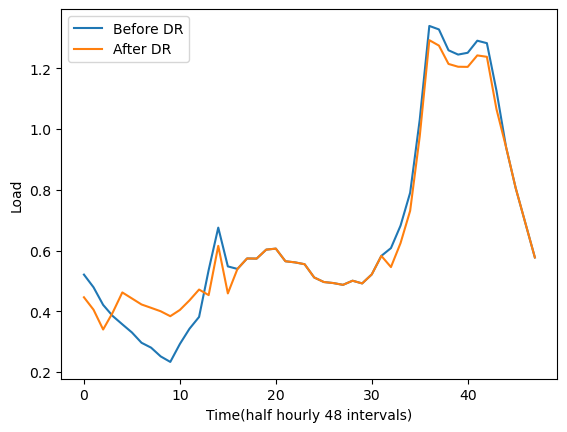

In [84]:
plt.plot(power_si, label='Before DR')
plt.plot(optimal_solution, label='After DR')

# Adding labels and a legend
plt.xlabel('Time(half hourly 48 intervals)')
plt.ylabel('Load')
plt.legend()

# Display the plot
plt.show()

In [85]:
np.sum(power_si)

31.244471232876712

In [86]:
np.sum(optimal_solution)

31.244471232873934

In [87]:
import numpy as np
from scipy.optimize import minimize
# calculating sum of pv genration
customer_232_df = selected_GG[selected_GG['Customer'] == 232]
# Sum all the columns from index 3 to 51
sum_of_columns = customer_232_df.iloc[:,3:52].sum()
sum_of_values = sum_of_columns.iloc[3:52].sum()
# Example data
power_values = power_si  # Replace this with your actual data
price_signal = np.array([11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76, 11.76,
                         3.99, 3.99, 3.99, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2,
                         67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2,
                         67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2, 67.2])  # Your time-of-use pricing data

# Example constraints (you need to replace these with your actual constraints)
min_constraints = arr3
max_constraints = arr1
total_GC = np.sum(power_si)
total_threshold = total_GC-(sum_of_values*0.7)
# total_threshold = total_GC # Replace this with your actual total consumption threshold

# Define the cost function (minimize the product of power values and cost function)
def cost_function(variables):
    return np.sum(power_values * variables)

# Define the constraint function
def constraint_function(variables):
    total_consumption = np.sum(variables)
    return np.concatenate((variables - min_constraints, max_constraints - variables, [total_consumption - total_threshold]))

# Initial guess for the variables
initial_guess = np.zeros_like(power_values)

# Perform the optimization using Sequential Quadratic Programming (SQP)
result = minimize(cost_function, initial_guess, method='SLSQP', constraints={'type': 'ineq', 'fun': constraint_function})

# Optimal solution
optimal_solution = result.x

# Optimal cost (positive because the cost function is not negated)
optimal_cost = result.fun

print("Optimal Solution:", optimal_solution)
print("Optimal Cost (Energy Consumption):", optimal_cost)


Optimal Solution: [0.44620201 0.40520419 0.34006746 0.39599635 0.46215999 0.44236736
 0.4225354  0.41143427 0.40012207 0.38393657 0.40448225 0.43599741
 0.47163574 0.45334316 0.61560556 0.45893738 0.53952329 0.574
 0.57356712 0.60311233 0.6064     0.5648274  0.56114521 0.55506301
 0.51142466 0.49648219 0.49299726 0.48713973 0.50073425 0.49183562
 0.52152329 0.58253699 0.21388303 0.29282008 0.39916251 0.64434442
 0.96104004 0.94325575 0.88279721 0.87357209 0.87309421 0.91088526
 0.90627482 0.73382972 0.94060274 0.80609315 0.69183562 0.57742466]
Optimal Cost (Energy Consumption): 20.19111782735849


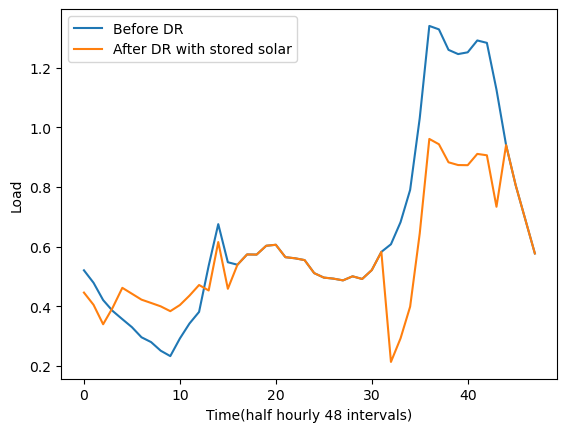

In [88]:
plt.plot(power_si, label='Before DR')
plt.plot(optimal_solution, label='After DR with stored solar')

# Adding labels and a legend
plt.xlabel('Time(half hourly 48 intervals)')
plt.ylabel('Load')
plt.legend()

# Display the plot
plt.show()

In [89]:
import numpy as np

def cost_function(variables, power_values):
    return np.sum(power_values * variables)

def move_firefly(firefly, attractive_firefly, beta0, gamma, alpha, lower_bound, upper_bound):
    distance_sq = np.sum((firefly - attractive_firefly) ** 2)
    direction = attractive_firefly - firefly
    beta = beta0 * np.exp(-gamma * distance_sq)
    epsilon = np.random.uniform(-1, 1, size=firefly.shape)
    step = alpha * (upper_bound - lower_bound) * epsilon
    new_firefly = firefly + beta * direction + step
    new_firefly = np.clip(new_firefly, lower_bound, upper_bound)  # Clip to ensure within bounds
    return new_firefly

def optimize_fireflies(population_size, num_variables, num_iterations, lower_bound, upper_bound, power_values, total_threshold):
    fireflies = np.random.uniform(lower_bound, upper_bound, size=(population_size, num_variables))
    cost_func = lambda x: cost_function(x, power_values)
    
    for _ in range(num_iterations):
        for i in range(population_size):
            for j in range(population_size):
                if cost_func(fireflies[i]) > cost_func(fireflies[j]):
                    fireflies[i] = move_firefly(fireflies[i], fireflies[j], beta0=1.0, gamma=1.0, alpha=0.01,
                                                lower_bound=lower_bound, upper_bound=upper_bound)
        # Ensure total consumption constraint
        total_consumption = np.sum(fireflies, axis=1)
        adjustment = (total_consumption - total_threshold)[:, None] / num_variables
        fireflies -= adjustment
    
    # Find the best solution
    best_index = np.argmin([cost_func(individual) for individual in fireflies])
    best_solution = fireflies[best_index]
    return best_solution

# Example usage
population_size = 50
num_variables = 48
num_iterations = 100
lower_bound = np.array(arr2)  # Convert to NumPy array
upper_bound = np.array(arr1)  # Convert to NumPy array
total_threshold = np.sum(power_si)
best_solution = optimize_fireflies(population_size, num_variables, num_iterations, lower_bound, upper_bound, power_si, total_threshold)
print("Optimal Solution:", best_solution)
print("Total Consumption:", np.sum(best_solution))
print("Optimal Cost:", cost_function(best_solution, power_si))


Optimal Solution: [0.55760855 0.54243258 0.39004757 0.41619679 0.31743941 0.38263865
 0.33245585 0.29415204 0.39844675 0.32705657 0.2189691  0.40200279
 0.38153676 0.58189686 0.61830704 0.47413746 0.53952446 0.57400117
 0.5735683  0.6031135  0.60640117 0.56482857 0.56114638 0.55506419
 0.51142583 0.49648337 0.49299843 0.4871409  0.50073542 0.49183679
 0.52152446 0.58253816 0.65522743 0.64522372 0.7333088  0.97775911
 1.29307644 1.27777858 1.25502056 1.2239554  1.20933912 1.30628405
 1.2870238  1.06685748 0.94060391 0.80609433 0.69183679 0.57742583]
Total Consumption: 31.244471232876712
Optimal Cost: 24.88342048148799


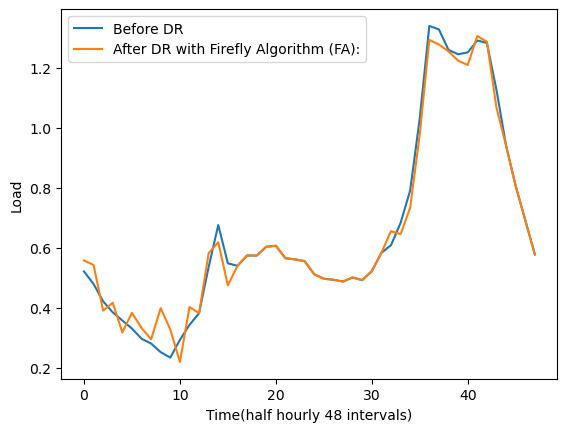

In [90]:
plt.plot(power_si, label='Before DR')
plt.plot(best_solution, label='After DR with Firefly Algorithm (FA):')

# Adding labels and a legend
plt.xlabel('Time(half hourly 48 intervals)')
plt.ylabel('Load')
plt.legend()

# Display the plot
plt.show()

In [91]:
np.sum(best_solution)

31.244471232876712

In [92]:
import numpy as np

class Particle:
    def __init__(self, num_variables, lower_bound, upper_bound):
        self.position = np.random.uniform(lower_bound, upper_bound, size=num_variables)
        self.velocity = np.random.uniform(-1, 1, size=num_variables)
        self.best_position = self.position.copy()

def cost_function(variables, power_values):
    return np.sum(power_values * variables)

def optimize_pso(population_size, num_variables, num_iterations, lower_bound, upper_bound, power_values, total_threshold):
    particles = [Particle(num_variables, lower_bound, upper_bound) for _ in range(population_size)]
    best_global_position = None
    best_global_cost = np.inf

    for _ in range(num_iterations):
        for particle in particles:
            particle.position = np.clip(particle.position, lower_bound, upper_bound)  # Clip to enforce constraints
            cost = cost_function(particle.position, power_values)
            if cost < cost_function(particle.best_position, power_values):
                particle.best_position = particle.position.copy()
            if cost < best_global_cost:
                best_global_position = particle.position.copy()
                best_global_cost = cost

        for particle in particles:
            r1, r2 = np.random.uniform(0, 1, size=num_variables), np.random.uniform(0, 1, size=num_variables)
            particle.velocity = 0.5 * particle.velocity + r1 * (particle.best_position - particle.position) + r2 * (best_global_position - particle.position)
            particle.position = np.clip(particle.position + particle.velocity, lower_bound, upper_bound)  # Clip to enforce constraints

        total_consumption = sum(particle.position for particle in particles)
        adjustment = (total_consumption - total_threshold) / num_variables
        for particle in particles:
            particle.position -= adjustment
            particle.position = np.clip(particle.position, lower_bound, upper_bound)  # Clip to enforce constraints

    return best_global_position

# Example usage
population_size = 50
num_variables = 48
num_iterations = 100
lower_bound = np.array(arr2)  # Convert to NumPy array
upper_bound = np.array(arr1)  # Convert to NumPy array
total_threshold = np.sum(power_si)
best_solution = optimize_pso(population_size, num_variables, num_iterations, lower_bound, upper_bound, power_si, total_threshold)
print("Optimal Solution:", best_solution)
print("Total Consumption:", np.sum(best_solution))
print("Optimal Cost:", cost_function(best_solution, power_si))


Optimal Solution: [0.45429449 0.51363451 0.38942704 0.42630786 0.35339335 0.23975153
 0.24274942 0.31106453 0.189933   0.17354049 0.34413203 0.30547269
 0.45921044 0.5029989  0.70468087 0.47698773 0.53952329 0.574
 0.57356712 0.60311233 0.6064     0.5648274  0.56114521 0.55506301
 0.51142466 0.49648219 0.49299726 0.48713973 0.50073425 0.49183562
 0.52152329 0.58253699 0.57888623 0.63222062 0.76732192 1.01542635
 1.32341951 1.35661263 1.23031323 1.21383694 1.21193472 1.28080521
 1.2529606  1.14695998 0.94060274 0.80609315 0.69183562 0.57742466]
Total Consumption: 30.77654527026553
Optimal Cost: 24.85465741244027


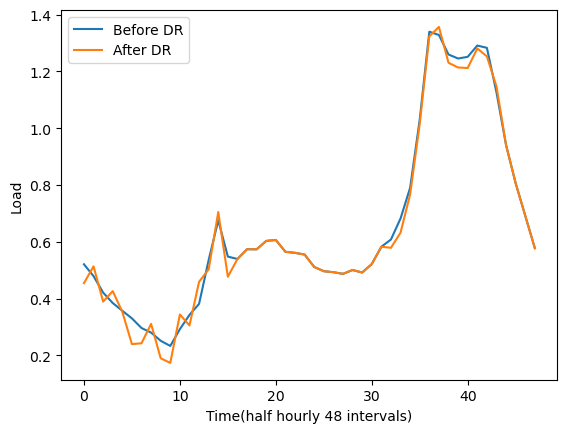

In [93]:
plt.plot(power_si, label='Before DR')
plt.plot(best_solution, label='After DR')  

# Adding labels and a legend
plt.xlabel('Time(half hourly 48 intervals)')
plt.ylabel('Load')
plt.legend()

# Display the plot
plt.show()

In [94]:
np.sum(best_solution)

30.77654527026553

In [95]:
# ##############
selected_houses_temp= selected_houses['Customers'].values
cluster = pd.read_csv('output.csv')
temp_cluster = cluster[cluster['Customer'].isin(selected_houses_temp)]
clusters = temp_cluster['clusters'].tolist()
clusters
temp_cluster
b = temp_cluster[temp_cluster['clusters'] == 2]['Customer'].unique()
# a = temp_cluster[temp_cluster['Customer'] == 232]['clusters'].unique()
b


array([ 13,  16,  25,  31,  79,  94,  96, 100, 147, 161, 188, 194, 200,
       221, 232, 258, 279, 299], dtype=int64)

constaraint hourwise :
hour
00:00:00    14.887893
00:30:00    16.235960
01:00:00    17.130422
01:30:00    13.679630
02:00:00    13.743573
02:30:00    14.522351
03:00:00    14.148651
03:30:00    13.127825
04:00:00    13.086096
04:30:00    16.603751
05:00:00    18.070641
05:30:00    14.487340
06:00:00    16.040708
06:30:00     9.071779
07:00:00     8.678055
07:30:00     8.692287
08:00:00     7.962602
08:30:00     7.204303
09:00:00     6.980582
09:30:00     7.928847
10:00:00    10.167770
10:30:00    12.296631
11:00:00    12.205747
11:30:00    12.535643
12:00:00    12.239427
12:30:00    12.898187
13:00:00    11.478213
13:30:00    18.141554
14:00:00    11.773064
14:30:00    10.558931
15:00:00     8.423688
15:30:00     9.105794
16:00:00     7.699341
16:30:00     6.587927
17:00:00     5.824242
17:30:00     7.000525
18:00:00     5.217773
18:30:00     5.263682
19:00:00     5.263864
19:30:00     5.259863
20:00:00     5.503238
20:30:00     6.339870
21:00:00     7.200733
21:30:00     9.685859
22:0

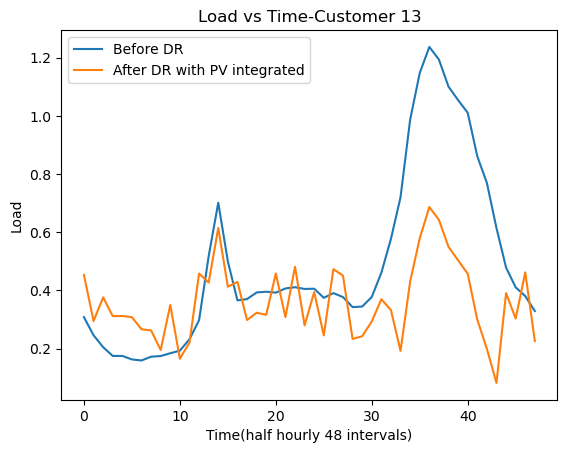

constaraint hourwise :
hour
00:00:00     4.904131
00:30:00     5.190097
01:00:00     4.758275
01:30:00     5.105623
02:00:00     4.912575
02:30:00     5.687177
03:00:00     5.515098
03:30:00     4.543103
04:00:00     7.708981
04:30:00     4.775714
05:00:00     7.962978
05:30:00     8.253769
06:00:00     6.464396
06:30:00     3.265903
07:00:00     3.717219
07:30:00     5.329191
08:00:00     8.037126
08:30:00    12.650873
09:00:00    10.919726
09:30:00     6.689671
10:00:00     7.835270
10:30:00     9.930424
11:00:00     9.201958
11:30:00    12.888468
12:00:00     9.127481
12:30:00     8.603477
13:00:00     8.393621
13:30:00     9.257814
14:00:00     7.744756
14:30:00     6.969393
15:00:00     6.761298
15:30:00     6.413697
16:00:00     6.007117
16:30:00     5.783957
17:00:00     5.498460
17:30:00     4.478889
18:00:00     4.346962
18:30:00     4.571854
19:00:00     4.701408
19:30:00     4.760857
20:00:00     5.164928
20:30:00     5.253149
21:00:00     5.708634
21:30:00     6.655922
22:0

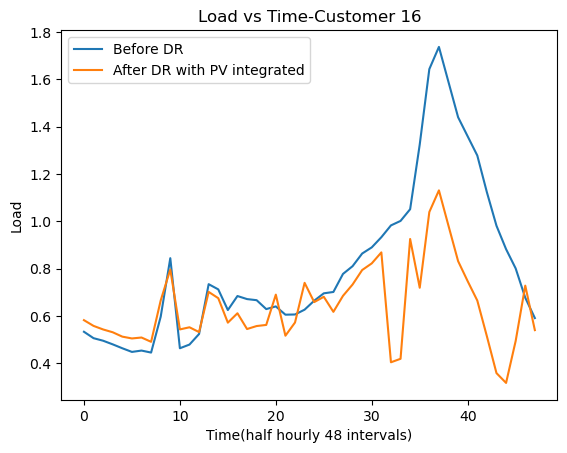

constaraint hourwise :
hour
00:00:00    10.778896
00:30:00     7.907295
01:00:00     8.908607
01:30:00     6.440955
02:00:00     8.636818
02:30:00     6.930787
03:00:00    12.224407
03:30:00    16.580302
04:00:00    13.746785
04:30:00     4.920949
05:00:00     4.803980
05:30:00     6.169513
06:00:00    17.817030
06:30:00     9.563297
07:00:00     8.351692
07:30:00     9.232847
08:00:00     9.460927
08:30:00    10.339009
09:00:00     9.786245
09:30:00    10.535209
10:00:00    13.743211
10:30:00    11.996358
11:00:00    10.485024
11:30:00    10.030112
12:00:00     9.454996
12:30:00     8.159457
13:00:00     7.840369
13:30:00     7.250992
14:00:00     6.753392
14:30:00     6.186874
15:00:00     5.902355
15:30:00     5.995913
16:00:00     5.630552
16:30:00     6.146337
17:00:00     5.165246
17:30:00     4.117445
18:00:00     4.012830
18:30:00     4.193981
19:00:00     4.859088
19:30:00     4.565101
20:00:00     4.779813
20:30:00     4.176114
21:00:00     5.278739
21:30:00     4.717928
22:0

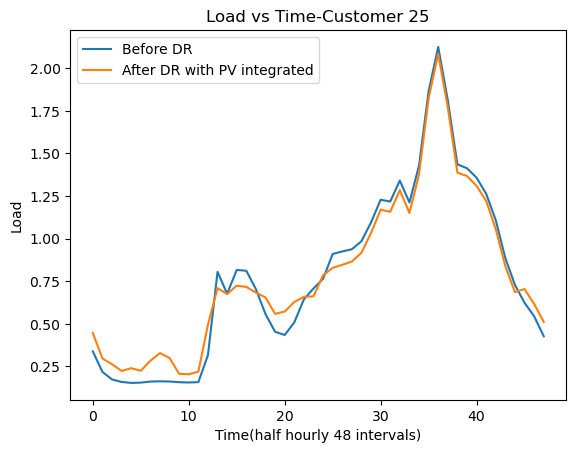

constaraint hourwise :
hour
00:00:00     7.873734
00:30:00     5.729351
01:00:00     6.745726
01:30:00     6.403099
02:00:00     2.744954
02:30:00     3.313085
03:00:00     3.989357
03:30:00     2.135367
04:00:00     2.330107
04:30:00     2.007065
05:00:00     2.319010
05:30:00     7.100536
06:00:00     8.174893
06:30:00    10.114535
07:00:00     7.848041
07:30:00     7.155968
08:00:00     7.896944
08:30:00     7.569734
09:00:00    13.788197
09:30:00    13.240754
10:00:00    12.700400
10:30:00     9.212328
11:00:00     9.504401
11:30:00     8.743580
12:00:00     8.894134
12:30:00    11.998137
13:00:00    10.942382
13:30:00    10.502228
14:00:00     9.403686
14:30:00    11.033957
15:00:00    13.980089
15:30:00     9.069394
16:00:00     9.033538
16:30:00    10.024562
17:00:00    10.437175
17:30:00     9.364111
18:00:00     9.464987
18:30:00     8.413859
19:00:00     6.059267
19:30:00     5.719684
20:00:00     6.783315
20:30:00     7.272707
21:00:00     7.853545
21:30:00     6.971158
22:0

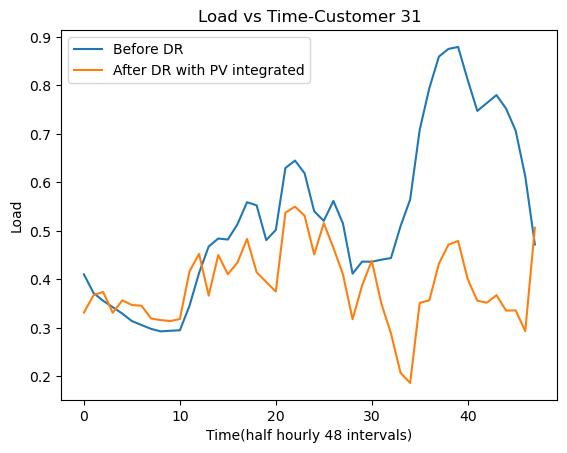

constaraint hourwise :
hour
00:00:00     6.460767
00:30:00     8.194174
01:00:00     4.305679
01:30:00     5.227610
02:00:00     6.328122
02:30:00     5.879324
03:00:00     5.962906
03:30:00     5.910379
04:00:00     5.204734
04:30:00     4.583431
05:00:00     4.623053
05:30:00     3.643026
06:00:00     3.556999
06:30:00     3.783577
07:00:00     4.163697
07:30:00     4.369001
08:00:00     7.294681
08:30:00     7.770970
09:00:00     5.876937
09:30:00     8.875610
10:00:00     7.561375
10:30:00    12.118338
11:00:00     9.923389
11:30:00     9.736232
12:00:00     8.885679
12:30:00     8.059857
13:00:00     9.416885
13:30:00    10.039064
14:00:00    10.570030
14:30:00     8.304412
15:00:00     9.267212
15:30:00     8.531286
16:00:00     8.934551
16:30:00     9.128970
17:00:00     8.377941
17:30:00     9.954829
18:00:00     7.044173
18:30:00     5.403421
19:00:00     5.301424
19:30:00     5.932578
20:00:00     5.567847
20:30:00     3.506555
21:00:00     4.248945
21:30:00     4.389197
22:0

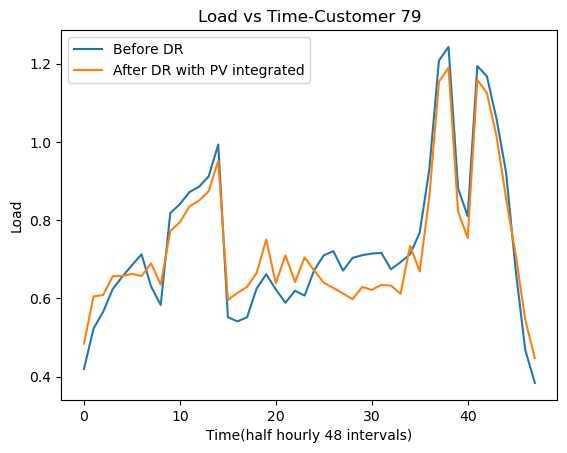

constaraint hourwise :
hour
00:00:00     4.124186
00:30:00     3.622351
01:00:00     3.994668
01:30:00     4.532666
02:00:00     4.874687
02:30:00     4.577687
03:00:00     5.259680
03:30:00     6.078446
04:00:00     6.923913
04:30:00     6.282401
05:00:00     6.745615
05:30:00     4.542379
06:00:00     4.771904
06:30:00     6.172770
07:00:00     7.345525
07:30:00    10.675527
08:00:00     5.723329
08:30:00     5.457824
09:00:00     5.445561
09:30:00     5.307988
10:00:00     5.452553
10:30:00     8.956752
11:00:00     5.640546
11:30:00     4.398232
12:00:00     3.897797
12:30:00     4.325156
13:00:00     4.955094
13:30:00     4.129169
14:00:00     4.479789
14:30:00     4.573430
15:00:00     3.961928
15:30:00     5.137349
16:00:00     4.530928
16:30:00     4.520849
17:00:00     4.459875
17:30:00     4.138459
18:00:00     4.325882
18:30:00     3.974630
19:00:00     4.094114
19:30:00     4.214409
20:00:00     4.057962
20:30:00     3.872362
21:00:00     4.228856
21:30:00     3.501593
22:0

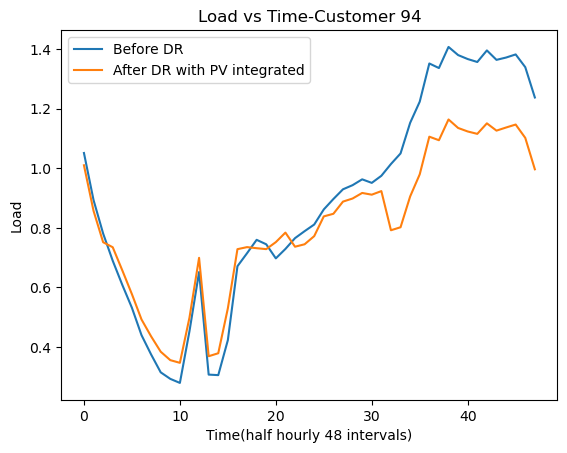

constaraint hourwise :
hour
00:00:00     9.336007
00:30:00    11.397996
01:00:00    12.738620
01:30:00    13.062594
02:00:00    12.782200
02:30:00    13.790094
03:00:00    12.110962
03:30:00    13.902501
04:00:00     8.628842
04:30:00    12.980339
05:00:00    13.373664
05:30:00    12.542343
06:00:00    10.965921
06:30:00     9.099255
07:00:00     6.534316
07:30:00     5.444425
08:00:00     4.487463
08:30:00     4.131843
09:00:00     4.166128
09:30:00     4.572002
10:00:00     4.420385
10:30:00     5.663152
11:00:00     5.649151
11:30:00     4.986070
12:00:00     5.728679
12:30:00     5.432054
13:00:00     5.007688
13:30:00     5.322574
14:00:00     6.040364
14:30:00     5.821949
15:00:00     5.937345
15:30:00     4.947482
16:00:00     4.237367
16:30:00     4.486832
17:00:00     4.226313
17:30:00     3.814703
18:00:00     3.508352
18:30:00     2.979230
19:00:00     2.972404
19:30:00     3.613296
20:00:00     3.689872
20:30:00     3.382881
21:00:00     3.064174
21:30:00     3.754393
22:0

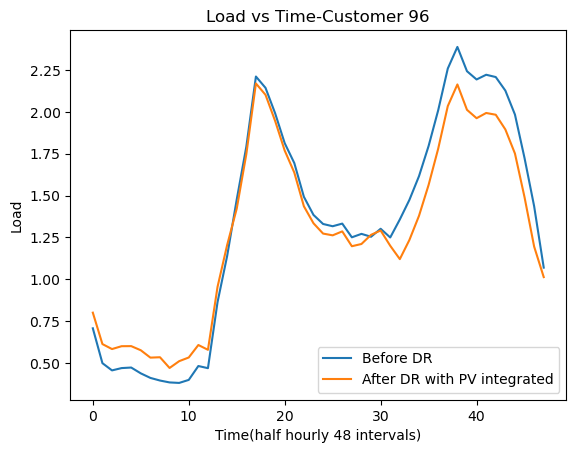

constaraint hourwise :
hour
00:00:00     9.629747
00:30:00     5.701151
01:00:00     6.512672
01:30:00     5.101956
02:00:00     5.315690
02:30:00     4.893954
03:00:00     5.213235
03:30:00     6.025181
04:00:00     6.089959
04:30:00     5.943969
05:00:00     5.672946
05:30:00     4.938475
06:00:00    13.098022
06:30:00    15.158410
07:00:00     9.168136
07:30:00     9.494753
08:00:00     5.875467
08:30:00     5.465965
09:00:00     5.972877
09:30:00     6.465544
10:00:00     6.772633
10:30:00     6.872767
11:00:00     6.347503
11:30:00     5.319970
12:00:00     5.489822
12:30:00     7.482462
13:00:00    11.115881
13:30:00     9.280871
14:00:00     6.646846
14:30:00     9.077400
15:00:00     8.886013
15:30:00     7.487245
16:00:00     8.214469
16:30:00     8.883350
17:00:00     8.161385
17:30:00     5.122778
18:00:00     5.014269
18:30:00     4.869946
19:00:00     5.331154
19:30:00     4.588948
20:00:00     5.652924
20:30:00     5.916231
21:00:00     5.571311
21:30:00     8.094683
22:0

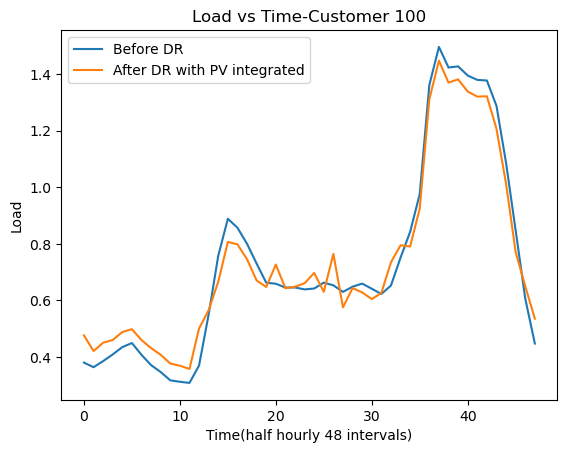

constaraint hourwise :
hour
00:00:00    5.017538
00:30:00    5.890999
01:00:00    6.942112
01:30:00    7.263404
02:00:00    7.030805
02:30:00    6.927096
03:00:00    7.274276
03:30:00    7.227518
04:00:00    7.453418
04:30:00    7.389587
05:00:00    7.150744
05:30:00    7.180770
06:00:00    7.043548
06:30:00    6.267248
07:00:00    4.694734
07:30:00    4.302485
08:00:00    4.627480
08:30:00    4.432148
09:00:00    5.075646
09:30:00    6.594017
10:00:00    6.237339
10:30:00    4.548638
11:00:00    4.037312
11:30:00    4.128581
12:00:00    3.874076
12:30:00    5.152906
13:00:00    6.750851
13:30:00    7.274092
14:00:00    7.908992
14:30:00    6.796506
15:00:00    7.666477
15:30:00    6.615097
16:00:00    7.423049
16:30:00    8.177745
17:00:00    7.332985
17:30:00    6.018698
18:00:00    5.095608
18:30:00    3.979460
19:00:00    4.157584
19:30:00    4.220111
20:00:00    4.063663
20:30:00    4.263937
21:00:00    4.200932
21:30:00    4.550307
22:00:00    4.333463
22:30:00    4.084569
23:00:

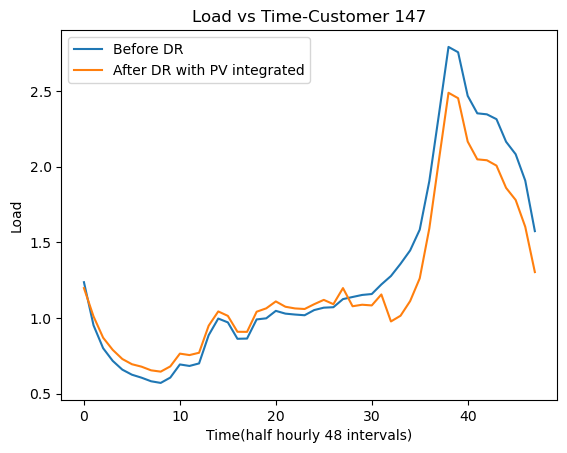

constaraint hourwise :
hour
00:00:00     5.260939
00:30:00    13.055468
01:00:00    11.088199
01:30:00     6.129664
02:00:00     5.525736
02:30:00     6.210083
03:00:00    18.559642
03:30:00     5.118868
04:00:00    17.311750
04:30:00    16.203271
05:00:00    12.886932
05:30:00     8.965528
06:00:00     7.611740
06:30:00     5.696694
07:00:00     4.272303
07:30:00     4.322051
08:00:00     5.321822
08:30:00     4.613279
09:00:00     3.998397
09:30:00     4.132593
10:00:00     4.844998
10:30:00     5.122350
11:00:00     4.952067
11:30:00     5.340281
12:00:00     7.503795
12:30:00     6.919422
13:00:00     6.695219
13:30:00     6.815767
14:00:00     6.691700
14:30:00     6.051870
15:00:00     5.668294
15:30:00     5.611686
16:00:00     6.454842
16:30:00     6.201914
17:00:00     4.461012
17:30:00     4.425309
18:00:00     4.027346
18:30:00     3.565232
19:00:00     4.003782
19:30:00     4.083245
20:00:00     4.558616
20:30:00     4.062399
21:00:00     3.505027
21:30:00     5.272717
22:0

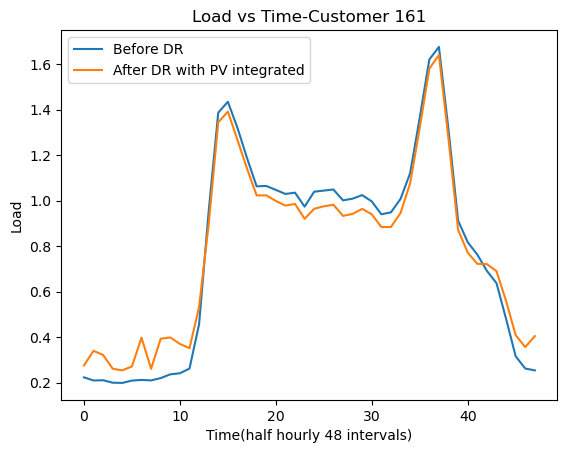

constaraint hourwise :
hour
00:00:00     4.338003
00:30:00     5.302867
01:00:00     6.406025
01:30:00    30.566771
02:00:00    28.567837
02:30:00     7.843682
03:00:00     2.601976
03:30:00     1.868778
04:00:00     3.058597
04:30:00     2.618722
05:00:00     4.014125
05:30:00     8.175722
06:00:00     4.432787
06:30:00    13.308363
07:00:00    11.586606
07:30:00     6.224472
08:00:00     5.343641
08:30:00     9.249417
09:00:00    15.190504
09:30:00    17.944690
10:00:00    15.017054
10:30:00    16.333676
11:00:00    16.241218
11:30:00    17.727691
12:00:00    18.683227
12:30:00    10.286433
13:00:00    17.052010
13:30:00    15.826135
14:00:00     8.043653
14:30:00    23.834290
15:00:00    18.508161
15:30:00    20.047299
16:00:00    16.148408
16:30:00    16.328818
17:00:00    14.170400
17:30:00     9.708068
18:00:00     6.195393
18:30:00     4.934383
19:00:00     4.941318
19:30:00     4.564071
20:00:00     4.987435
20:30:00     4.967564
21:00:00     5.529192
21:30:00     6.394948
22:0

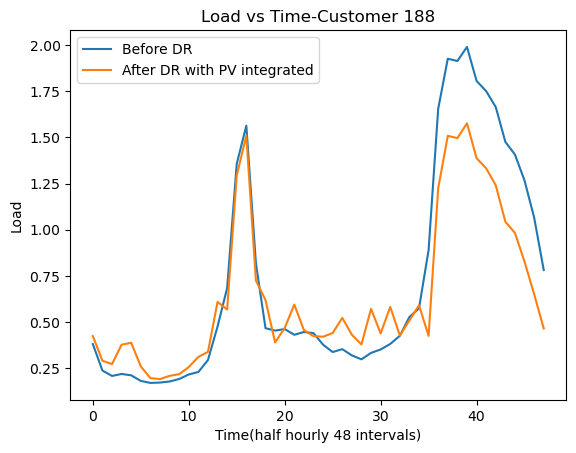

constaraint hourwise :
hour
00:00:00     6.307816
00:30:00    13.966766
01:00:00    11.708494
01:30:00     7.252982
02:00:00     6.970397
02:30:00     8.909038
03:00:00     8.343432
03:30:00     7.031595
04:00:00     7.041342
04:30:00     5.877762
05:00:00     4.779778
05:30:00     5.435653
06:00:00     5.987114
06:30:00     6.410313
07:00:00     6.345314
07:30:00     7.914001
08:00:00     8.866141
08:30:00     9.255312
09:00:00    10.940358
09:30:00    11.518692
10:00:00    10.811876
10:30:00     6.553004
11:00:00     7.370217
11:30:00     9.124127
12:00:00    12.225798
12:30:00     7.904550
13:00:00     7.672211
13:30:00    10.258314
14:00:00     9.855460
14:30:00     8.836194
15:00:00     7.202629
15:30:00     8.859537
16:00:00     8.097527
16:30:00     7.419848
17:00:00     5.194219
17:30:00     5.328844
18:00:00     3.523729
18:30:00     3.722223
19:00:00     3.642606
19:30:00     4.339958
20:00:00     4.484807
20:30:00     4.496343
21:00:00     4.165841
21:30:00     4.899004
22:0

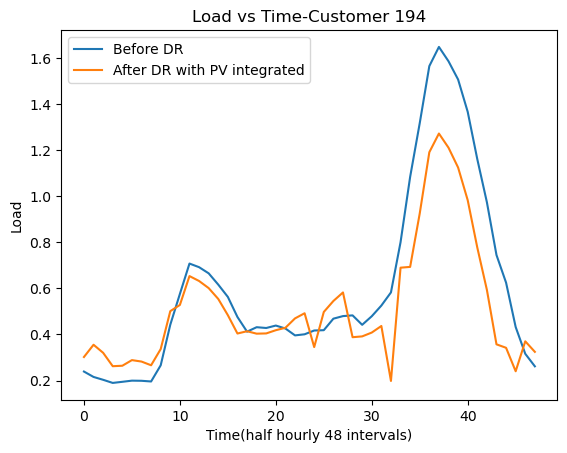

constaraint hourwise :
hour
00:00:00    4.279802
00:30:00    4.723454
01:00:00    4.980188
01:30:00    3.881349
02:00:00    4.282997
02:30:00    4.281454
03:00:00    4.546342
03:30:00    4.341605
04:00:00    4.438728
04:30:00    4.231240
05:00:00    4.336227
05:30:00    4.587811
06:00:00    4.991951
06:30:00    8.850776
07:00:00    7.713163
07:30:00    6.495157
08:00:00    6.413443
08:30:00    6.360562
09:00:00    7.178449
09:30:00    6.119469
10:00:00    6.913938
10:30:00    7.536846
11:00:00    7.987760
11:30:00    7.806942
12:00:00    7.325566
12:30:00    7.371731
13:00:00    7.054635
13:30:00    7.813509
14:00:00    7.370913
14:30:00    7.303618
15:00:00    7.247563
15:30:00    7.220614
16:00:00    7.370362
16:30:00    7.011129
17:00:00    6.185096
17:30:00    5.918656
18:00:00    5.682528
18:30:00    5.155281
19:00:00    4.540761
19:30:00    4.314997
20:00:00    4.064336
20:30:00    4.339945
21:00:00    4.493192
21:30:00    4.296124
22:00:00    3.286872
22:30:00    4.824556
23:00:

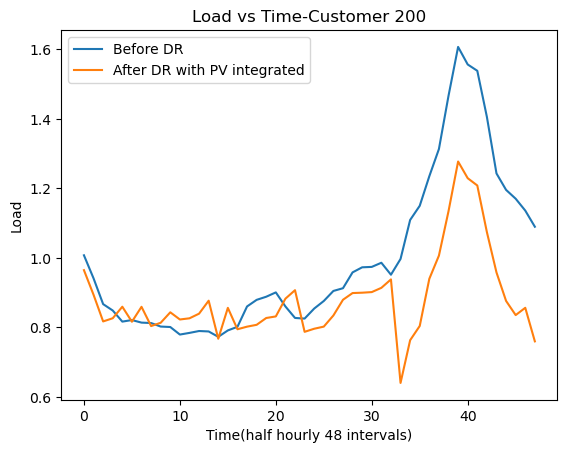

constaraint hourwise :
hour
00:00:00     8.883114
00:30:00     6.878479
01:00:00     7.636064
01:30:00     7.328226
02:00:00     7.526472
02:30:00     6.784739
03:00:00     6.766964
03:30:00     7.083026
04:00:00     7.682225
04:30:00     7.539697
05:00:00     8.037925
05:30:00     8.174580
06:00:00     7.461509
06:30:00     5.278014
07:00:00     5.808242
07:30:00     6.901036
08:00:00     6.923451
08:30:00     9.588748
09:00:00     7.692029
09:30:00     6.514316
10:00:00    10.533450
10:30:00    10.297108
11:00:00     9.744177
11:30:00     8.776307
12:00:00    11.835445
12:30:00     9.038544
13:00:00     9.489810
13:30:00     8.030642
14:00:00    10.408587
14:30:00     8.673452
15:00:00     8.117121
15:30:00     9.627507
16:00:00     7.429685
16:30:00     7.969101
17:00:00     7.755155
17:30:00     5.789533
18:00:00     6.170319
18:30:00     4.768682
19:00:00     4.497259
19:30:00     3.989211
20:00:00     3.560605
20:30:00     4.893797
21:00:00     3.890258
21:30:00     3.721174
22:0

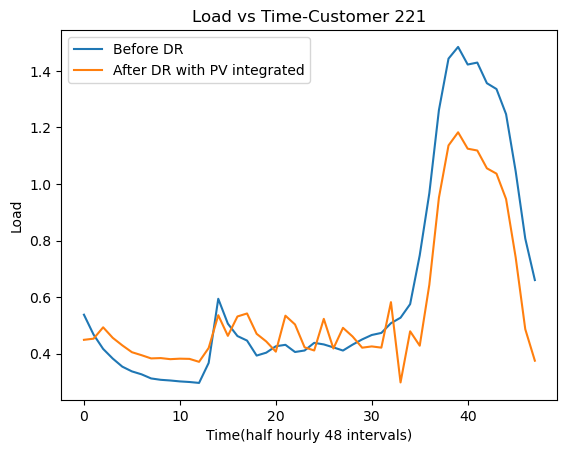

constaraint hourwise :
hour
00:00:00     7.464731
00:30:00     7.385334
01:00:00     8.106679
01:30:00     9.494099
02:00:00    10.499287
02:30:00    11.199476
03:00:00    12.609704
03:30:00    13.115482
04:00:00    14.863714
04:30:00    15.059411
05:00:00    11.201102
05:30:00     9.340563
06:00:00     9.011245
06:30:00     8.258560
07:00:00     5.995060
07:30:00     8.895851
08:00:00     8.318455
08:30:00     9.756098
09:00:00     8.916132
09:30:00     8.665053
10:00:00     7.420844
10:30:00     7.676681
11:00:00     7.374205
11:30:00     8.467507
12:00:00     8.235817
12:30:00    10.522029
13:00:00     6.998010
13:30:00     7.521456
14:00:00     7.712674
14:30:00     7.957943
15:00:00     8.701433
15:30:00     6.887116
16:00:00     6.248592
16:30:00     5.752695
17:00:00     5.946397
17:30:00     5.447385
18:00:00     4.693439
18:30:00     5.318443
19:00:00     4.496900
19:30:00     4.005165
20:00:00     4.644734
20:30:00     4.840972
21:00:00     4.492701
21:30:00     6.061046
22:0

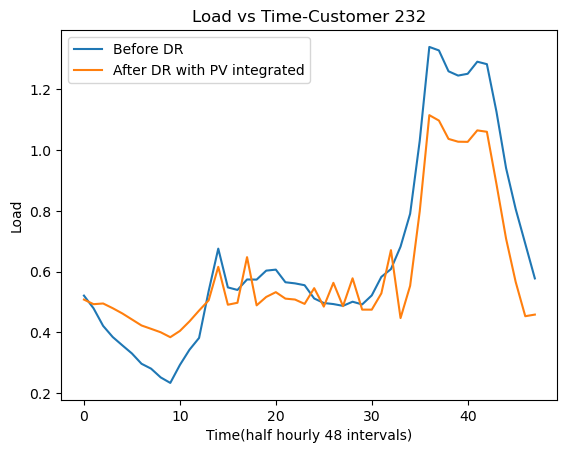

constaraint hourwise :
hour
00:00:00    4.296920
00:30:00    4.974995
01:00:00    4.614412
01:30:00    4.386149
02:00:00    4.747809
02:30:00    7.748855
03:00:00    7.614460
03:30:00    5.736181
04:00:00    5.331552
04:30:00    5.288111
05:00:00    5.674632
05:30:00    5.543327
06:00:00    5.253323
06:30:00    5.141768
07:00:00    5.457499
07:30:00    6.034882
08:00:00    4.665800
08:30:00    4.671626
09:00:00    4.355005
09:30:00    4.630316
10:00:00    5.007807
10:30:00    4.703929
11:00:00    4.675600
11:30:00    4.725041
12:00:00    4.948754
12:30:00    4.909713
13:00:00    5.976669
13:30:00    5.057473
14:00:00    4.678060
14:30:00    5.794260
15:00:00    5.586062
15:30:00    6.250671
16:00:00    5.012104
16:30:00    4.397590
17:00:00    4.614866
17:30:00    4.998555
18:00:00    4.428106
18:30:00    4.230494
19:00:00    4.230043
19:30:00    4.179399
20:00:00    4.235467
20:30:00    3.891933
21:00:00    4.164086
21:30:00    4.503057
22:00:00    4.382422
22:30:00    4.402140
23:00:

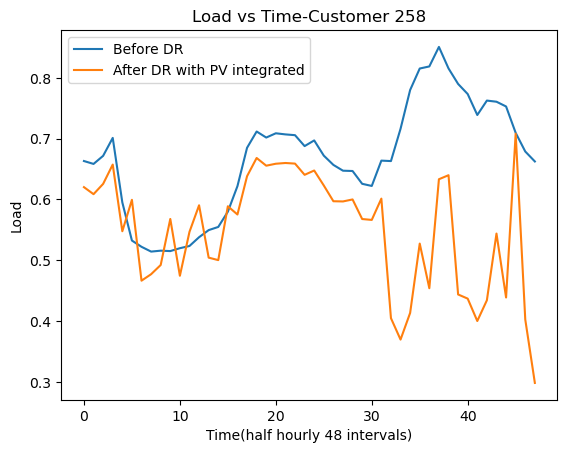

constaraint hourwise :
hour
00:00:00     9.080094
00:30:00    11.758652
01:00:00    11.824468
01:30:00    12.067838
02:00:00    11.419315
02:30:00    12.011668
03:00:00    11.287061
03:30:00    11.118917
04:00:00    10.771323
04:30:00    12.798850
05:00:00    12.564514
05:30:00     5.253065
06:00:00     4.207768
06:30:00     4.433198
07:00:00     5.042815
07:30:00     3.533434
08:00:00     3.200499
08:30:00     3.866324
09:00:00     4.637929
09:30:00     5.314635
10:00:00     6.092291
10:30:00     6.009546
11:00:00     5.073902
11:30:00     5.594682
12:00:00     7.274142
12:30:00     5.280895
13:00:00     5.083763
13:30:00     5.967026
14:00:00     5.204010
14:30:00     5.371681
15:00:00     4.981452
15:30:00     4.740358
16:00:00     4.594761
16:30:00     5.562142
17:00:00     4.754268
17:30:00     3.495102
18:00:00     2.874509
18:30:00     3.327670
19:00:00     2.796497
19:30:00     2.640315
20:00:00     2.688861
20:30:00     2.844505
21:00:00     3.380490
21:30:00     3.311837
22:0

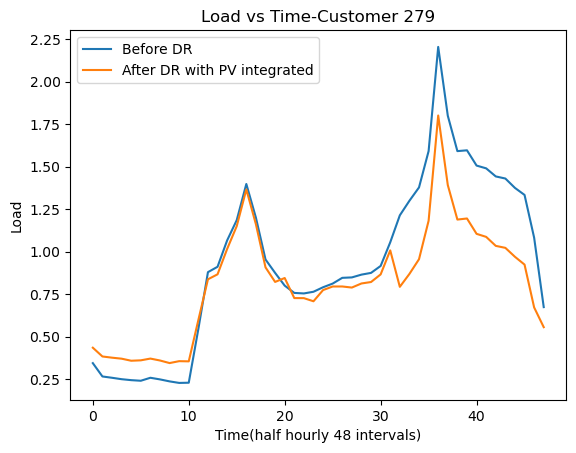

constaraint hourwise :
hour
00:00:00     7.996486
00:30:00     9.065375
01:00:00     9.790524
01:30:00    11.544646
02:00:00    10.971494
02:30:00    12.676956
03:00:00    12.505112
03:30:00    12.730514
04:00:00     9.126444
04:30:00     8.547950
05:00:00    10.784505
05:30:00     9.474284
06:00:00     8.412607
06:30:00     8.186622
07:00:00     6.489169
07:30:00     5.343119
08:00:00     3.973941
08:30:00     4.240057
09:00:00     3.955455
09:30:00     3.782002
10:00:00     3.925536
10:30:00     3.896165
11:00:00     4.642659
11:30:00     4.270444
12:00:00     3.814549
12:30:00     3.500445
13:00:00     3.748202
13:30:00     4.145413
14:00:00     4.311344
14:30:00     4.542456
15:00:00     5.515014
15:30:00     5.211759
16:00:00     6.554618
16:30:00     5.294769
17:00:00     5.060843
17:30:00     4.199185
18:00:00     4.338925
18:30:00     4.984025
19:00:00     3.720382
19:30:00     3.593849
20:00:00     3.753651
20:30:00     3.757807
21:00:00     3.342375
21:30:00     4.447913
22:0

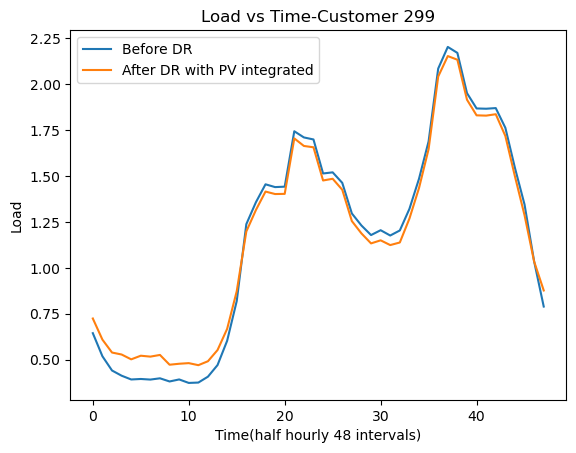

In [270]:
# for general any customer 
before_DR=np.zeros(48)
after_DR=np.zeros(48)
cost_before=0
cost_after=0
for i in range(len(b)) :
    c = b[i]
    
# melting the data frame for a customer

    df_opt = df_temp[df_temp['Customer']==c]
    # arr = df_opt.iloc[0, 5:53].values
    df_opt
    melt_df_opt = pd.melt(df_opt, id_vars = ['Customer'], value_vars = list(df_opt.columns[5:53]), var_name = 'hour', value_name = 'norm_energy')
      # hours to date time format
    melt_df_opt['hour'] = pd.to_datetime(melt_df_opt['hour']).dt.time
      # Sort the DataFrame based on the 'hour' column
    melt_df_opt = melt_df_opt.sort_values(by='hour')
    consumer_load = melt_df_opt['norm_energy'].values

    # for flexibility 

    def calculate_load_flexibility_max(group):
        average_load = group['norm_energy'].mean()
    #     print(average_load)
        max_load = group['norm_energy'].max()
        min_load = group['norm_energy'].min()
    #     print(min_load)
    #     return ((max_load ) ) 
        return ((max_load - min_load )/average_load)

    constraints = melt_df_opt.groupby('hour').apply(calculate_load_flexibility_max)

    print("constaraint hourwise :")
    print(constraints)
    constraints = constraints.values

    # mean of customer
    mean_df_13=melt_df_opt.groupby('hour').mean()
    print(mean_df_13)
    power_si=mean_df_13['norm_energy'].values
    mean_df_13
#     #####################################################
    before_DR = before_DR+power_si

    # timing arrays respectivel to cluster 2 and 0
    len(power_si)
    # print(power_si)
    # Initialize a new array with zeros
    result_array = np.ones_like(power_si)
    res_arr2 = np.ones_like(power_si)
#     result_array[0:16] = res_arr2[0:16]   # peak undershoot
#     result_array[32:48] = res_arr2[32:48]  # peak overshoot
    GG_array = np.zeros_like(power_si)
    GG_array[32:48] = res_arr2[32:48]   # peak overshoot for solar
    print(power_si)
    print(GG_array)
    result_array

    #  max and min contraints 

    arr1= []  #for max const 
    arr2=[]   #for min const 
    arr3=[]   #for min const with solar
    # for solar
    customer_232_df = selected_GG[selected_GG['Customer'] == c]
    # Sum all the columns from index 3 to 51
    sum_of_columns = customer_232_df.iloc[:,3:52].sum()
    sum_of_values = sum_of_columns.iloc[3:52].sum()
    value_pv = (sum_of_values/16) # as there are 12 peak instance 
    a = 0
    for i in range(48):
        arr1.append(power_si[i]+(0.01*constraints[i]*result_array[i]))
        arr2.append(power_si[i]-(0.01*constraints[i]*result_array[i]))
        if (power_si[i]-(0.01*constraints[i]*result_array[i])-(0.5*value_pv*GG_array[i]))>0:
            a = a+(0.5*value_pv*GG_array[i])
            arr3.append(power_si[i]-(0.01*constraints[i]*result_array[i])-(0.5*value_pv*GG_array[i]))#np.abs(power_si[i]-(0.05*arr[i]))

        else:
            arr3.append(power_si[i]-(0.01*constraints[i]*result_array[i]))


    print(arr3)
    # code for algo optimization
    import numpy as np

    class Particle:
        def __init__(self, num_variables, lower_bound, upper_bound):
            self.position = np.random.uniform(lower_bound, upper_bound, size=num_variables)
            self.velocity = np.random.uniform(-1, 1, size=num_variables)
            self.best_position = self.position.copy()

    def cost_function(variables, power_values):
        return np.sum(power_values * variables)

    def optimize_pso(population_size, num_variables, num_iterations, lower_bound, upper_bound, power_values, total_threshold):
        particles = [Particle(num_variables, lower_bound, upper_bound) for _ in range(population_size)]
        best_global_position = None
        best_global_cost = np.inf

        for _ in range(num_iterations):
            for particle in particles:
                particle.position = np.clip(particle.position, lower_bound, upper_bound)  # Clip to enforce constraints
                cost = cost_function(particle.position, power_values)
                if cost < cost_function(particle.best_position, power_values):
                    particle.best_position = particle.position.copy()
                if cost < best_global_cost:
                    best_global_position = particle.position.copy()
                    best_global_cost = cost

            for particle in particles:
                r1, r2 = np.random.uniform(0, 1, size=num_variables), np.random.uniform(0, 1, size=num_variables)
                particle.velocity = 0.5 * particle.velocity + r1 * (particle.best_position - particle.position) + r2 * (best_global_position - particle.position)
                particle.position = np.clip(particle.position + particle.velocity, lower_bound, upper_bound)  # Clip to enforce constraints

            total_consumption = sum(particle.position for particle in particles)
            adjustment = (total_consumption - total_threshold) / num_variables
            for particle in particles:
                particle.position -= adjustment
                particle.position = np.clip(particle.position, lower_bound, upper_bound)  # Clip to enforce constraints

        return best_global_position

    # Example usage
    population_size = 50
    num_variables = 48
    num_iterations = 100
#     # without solar
#     total_threshold = np.sum(power_si)
#     lower_bound = np.array(arr2)  # Convert to NumPy array

    upper_bound = np.array(arr1)  # Convert to NumPy array
    # with solar
    lower_bound = np.array(arr3) 
    total_threshold = np.sum(power_si)-(a)
    best_solution = optimize_pso(population_size, num_variables, num_iterations, lower_bound, upper_bound, power_si, total_threshold)
    ######################################
#     from scipy.optimize import minimize

#     # Example data

#     # Define the cost function (minimize the product of power values and cost function)
#     def cost_function(variables):
#         return np.sum(power_values * variables)
#     def cost_function1(variables, power_values):
#         return np.sum(power_values * variables)

#     # Define the constraint function
#     def constraint_function(variables):
#         total_consumption = np.sum(variables)
#         return np.concatenate((variables - min_constraints, max_constraints - variables, [total_consumption - total_threshold]))

#     # Initial guess for the variables
#     initial_guess = np.zeros_like(power_values)
#       # without solar
#     total_threshold = np.sum(power_si)
#     lower_bound = np.array(arr2)  # Convert to NumPy array

#     upper_bound = np.array(arr1)  # Convert to NumPy array
    
# #     # with solar
# #     lower_bound = np.array(arr3) 
    
# #     total_threshold = np.sum(power_si)-(a)
#     max_constraints = upper_bound
#     min_constraints = lower_bound

#     # Perform the optimization using Sequential Quadratic Programming (SQP)
#     result = minimize(cost_function, initial_guess, method='SLSQP', constraints={'type': 'ineq', 'fun': constraint_function})

#     # Optimal solution
#     best_solution = result.x

#     # Optimal cost (positive because the cost function is not negated)
# #     optimal_cost = result.fun
    after_DR = after_DR + best_solution
    print("Optimal Solution:", best_solution)
    print("Total Consumption before:", np.sum(power_si))
    print("Total Consumption after:", np.sum(best_solution))
    print("Cost Before:", cost_function1(power_si, price_signal))
    print("Optimal Cost:", cost_function1(best_solution, price_signal))
    
    cost_before = cost_before+ cost_function1(power_si, price_signal)
    cost_after = cost_after+ cost_function1(best_solution, price_signal)

    # print("Optimal Solution:", optimal_solution)
    # # print("Optimal Cost (Energy Consumption):", optimal_cost)

    # plotting solution
    plt.plot(power_si, label='Before DR ')
    plt.plot(best_solution, label='After DR with PV integrated')
    plt.title(f'Load vs Time-Customer {c}')

    # Adding labels and a legend
    plt.xlabel('Time(half hourly 48 intervals)')
    plt.ylabel('Load')
    plt.legend()

    # Display the plot
    plt.show()



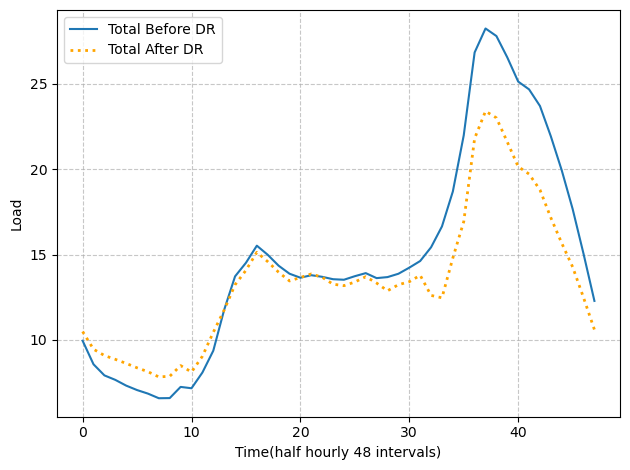

Cost Before: 41106.159622356165
Optimal Cost: 36272.948047146325
diff in cost 4833.21157520984


In [271]:
plt.plot(before_DR, label='Total Before DR')
# plt.plot(after_DR, label='Total After DR')  # PSO
plt.plot(after_DR, linestyle='dotted', color='orange', linewidth=2, label='Total After DR')  # PSO

# Adding labels and a legend
plt.xlabel('Time(half hourly 48 intervals)')
plt.ylabel('Load')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)  # Add grid with dashed lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Display the plot
# plt.savefig('final_plot.png')
plt.show()
print("Cost Before:", cost_before)
print("Optimal Cost:", cost_after)
print("diff in cost",cost_before- cost_after)

In [272]:
per = ((before_DR.max() - after_DR.max())/before_DR.max())*100
per

17.159436350409816